# DATA SCIENCE PROJECT:FIFA20 (CLUSTERING)

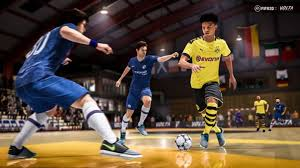

# BUSINESS CASE:

## WITH THE FIFA20 DATASET WE NEED TO CLUSTER THE PLAYER BY THEIR SKILL INTO CERTAIN GROUP

# Task 1:-Prepare a complete data analysis report on the given data.

In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [284]:
data=pd.read_csv('players_20.csv')
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## Domain Analysis

1. **sofifa_id** : SoFIFA is a database and forum. Every player in a FIFA Career Mode is included on SoFIFA’s database and having unique sofifa_id for each player.

2. **player_url** : it is the url of sofifa website(database), where it contains the entire data about the player.

3. **short_name and long_name** : these columns having the short and full name of the player.

4. **age** : This column contain the age of the player.

5. **dob** : This column contain the date of birth of the player.

6. **height_cm** : Hieght of the player in Centimeter.

7. **weight_kg** : Weight of the player in Kilogram.

8. **nationality** : Citizenship of the player.

9. **club** : This column is having data, for which club(team) he is playing for.

10. **overall** :  General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. 

11. **potential** : Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.

12. **value_eur** : value of player in euros.

13. **wage_eur** : Wages paid to player in euros.

14. **player_positions** : the positions that ordinarily handle the ball and are most responsible for scoring points.

15. **preferred_foot** : player's preffered foot(Left or Right) for taking a goal.

16. **international_reputation** : a player's international reputation is used to determine the final overall score, which is rated between 1 to 5 stars.

17. **weak_foot** :  Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.

18. **skill_moves** : skill moves refer to a set of moves that a player can perform to get past their opponents.

19. **work_rate** : Degree of the effort the player puts in terms of attack and defense rated as low, medium and high.

20. **body_type** : The "body type" of a player refers to the physical attributes of the player's body that affect how they move and interact with the ball.

21. **real_face** : "real face" refers to the feature that allows players to have a realistic representation of their face in the game.

22. **release_clause_eur** : "release clause EUR" refers to the amount of money that a team would have to pay in order to buy out a player's contract from his current team. 

23. **player_tags** :  "player tags" are a feature that allow players to quickly identify certain attributes or abilities of a player. These tags are applied to players based on their real-world abilities, and they can help players to quickly assess the strengths and weaknesses of their opponents.

24. **team position** :  "team position" refers to the position on the field that a player is assigned to play within a team.


25. **team_jersey_number** :  "team jersey number" refers to the number that is printed on a player's shirt, indicating their position on the field. In soccer, each player on a team is assigned a unique number that corresponds to their position on the field.

26. **loaned_from** :  "loaned from" refers to the team that a player is currently on loan from. A loaned player is a player that is temporarily transferred to another team, usually for a season or a specific amount of time. During this time, the player will play for the team he is loaned to, but he will still be considered a player of the team he is loaned from.

27. **joined** : "joined" refers to the date on which a player joined a team in the game. shows when the player was transferred to the team either through transfer or loan, it also indicates how long he has been playing for the team.

28. **contract_valid_until** :  "contract valid until" refers to the date when a player's contract with a team expires. shows the date when the player's contract with the current team will end.

29. **nation_position** :  "nation position" refers to the position on the field that a player is assigned to play within his national team.

30. **nation_jersey_number** : "nation jersey number" refers to the number that is printed on a player's shirt, indicating their position on the field within their national team. Each player on a national team is assigned a unique number that corresponds to their position on the field. 

31. **pace** :  "pace" is one of the attributes that determine a player's overall performance in the game. It refers to a player's speed and acceleration on the field, including their ability to run with the ball and make quick movements.

32. **shooting**:  "shooting" is one of the attributes that determine a player's overall performance in the game. It refers to a player's ability to score goals and take accurate shots on goal.  

33. **passing** :  "passing" is one of the attributes that determine a player's overall performance in the game. It refers to a player's ability to pass the ball accurately and effectively. 


34. **dribbling** : It refers to a player's ability to control the ball, move with it, and beat opponents with close control.


35. **defending** : It refers to a player's ability to defend, tackle, and intercept the ball.


36. **physic** : It refers to a player's physical attributes such as strength, stamina, jumping, and aggression.

37. **gk_diving** :  It refers to a goalkeeper's ability to dive and save shots on goal

38. **gk_handling** :  It refers to a goalkeeper's ability to catch, punch, and control the ball. 

39. **gk_kicking** :  It refers to a goalkeeper's ability to kick the ball, whether it's a goal kick, a clearance, or a pass.


40. **gk_reflexes** : GK reflexes is an important attribute for goalkeepers, as it allows them to make saves and prevent the opposing team from scoring. It's particularly important for goalkeepers who play in teams that face a lot of shots,or in a high-pressure environment.


41. **gk_speed** : GK speed is an important attribute for goalkeepers, as it allows them to move quickly and cover the goal area effectively. 


42. **gk_positioning** :  It refers to a goalkeeper's ability to position themselves effectively in the goal area, in order to make saves and prevent the opposing team from scoring.


43. **player_traits** : "player traits" are special characteristics that are assigned to players in the game, which can affect their performance on the field. These traits are designed to reflect the real-world abilities and tendencies of the players.

44. **attacking_crossing** : "attacking crossing" is a skill attribute that determine a player's ability to deliver accurate crosses into the box when attacking. This attribute is important for players that play in wide positions such as wingers or fullbacks, as it allows them to create scoring opportunities for their teammates.

45. **attacking_finishing** : "attacking finishing" is a skill attribute that determines a player's ability to score goals when attacking. It refers to a player's ability to take accurate shots and finish off plays


46. **attacking_heading_accuracy** : "attacking heading accuracy" is a skill attribute that determine a player's ability to score goals with headers when attacking. This attribute is important for players that play in positions such as forwards and central midfielders, as it allows them to score from crosses and set pieces. 


47. **attacking_short_passing** : "attacking short passing" is a skill attribute that determine a player's ability to make short, accurate passes when attacking. This attribute is important for players that play in midfield positions, as it allows them to maintain possession of the ball and create scoring opportunities for their teammates.


48. **attacking_volleys** :  "attacking volleys" is a skill attribute that determines a player's ability to score goals with volleys when attacking. It refers to a player's ability to strike the ball with power and accuracy when the ball is in the air and not on the ground.

49. **skill_dribbling** :  "skill dribbling" is a skill attribute that determine a player's ability to control the ball and beat opponents when in possession. This attribute is important for players that play in attacking positions, as it allows them to create scoring opportunities and take on defenders.

51. **skill_curve** - The "skill_curve" attribute refers to a player's ability to bend or curve the ball with shots or passes. 

52. **skill_fk_accuracy** - The "skill_fk_accuracy" attribute refers to a player's ability to take accurate free-kicks. It is used to indicate how well a player can make direct shots or passes with the ball from a dead-ball situation such as a free-kick, direct free-kick, or penalty.

53. **skill_long_passing** - The "skill_long_passing" attribute refers to a player's ability to make accurate long passes. It is used to indicate how well a player can make passes over a longer distance, typically to a teammate who is further away on the field.

54. **skill_ball_control** - The "skill_ball_control" attribute refers to a player's ability to control the ball with different parts of their body, such as their feet, chest, and head. It is used to indicate how well a player can control the ball and maintain possession, whether they are dribbling, passing, or receiving the ball.

55. **movement_acceleration** - The "movement_acceleration" attribute refers to a player's ability to increase their speed quickly. It is used to indicate how well a player can increase their speed quickly, whether they are starting from a standing position or already running.

56. **movement_sprint_speed** - It is used to indicate how fast a player can run at maximum effort, this is especially important for players on positions that need to cover a lot of ground and create space in attack. 

57. **movement_agility** - The "movement_agility" attribute refers to a player's ability to change direction quickly and smoothly. It is used to indicate how well a player can change direction quickly and smoothly, whether they are dribbling, running, or receiving the ball. 

58. **movement_reactions** -  The "movement_reactions" attribute refers to a player's ability to react quickly to different situations on the field.

59. **movement_balance** - The "movement_balance" attribute refers to a player's ability to maintain balance while moving. It is used to indicate how well a player can maintain balance while moving, whether they are dribbling, running, or receiving the ball.

60. **power_shot_power** - The "power_shot_power" attribute refers to a player's ability to generate power in their shots. It is used to indicate how well a player can generate power in their shots whether they be long-range shots, volleys, or free-kicks. 

61. **power_jumping** - It is used to indicate how well a player can jump high and win aerial balls, whether they be headers, volleys or clearances. 

62. **power_stamina** - The "power_stamina" attribute refers to a player's ability to maintain their energy and endurance throughout a match. It is used to indicate how well a player can maintain their energy and endurance throughout the match.

63. **Power_strength** is one of the attributes that can be used to quantify the physical strength of a football player.

64. **Power_long_shots** is one of the attributes that can be used to quantify the ability of a football player to score goals from long distances.

65. **mentality_aggression** is one of the attributes that can be used to quantify a player's mentality and approach to the game.

66. **Mentality_interceptions** is one of the attributes that can be used to quantify a player's ability to anticipate and intercept passes made by the opposing team.

67. **Mentality_positioning** is one of the attributes that can be used to quantify a player's ability to be in the right place at the right time on the field.

68. **Mentality_vision** is one of the attributes that can be used to quantify a player's ability to see and understand the game.

69. **Mentality_penalties** is one of the attributes that can be used to quantify a player's ability to score goals from penalty kicks.

70. **Mentality_composure** is one of the attributes that can be used to quantify a player's ability to remain calm under pressure.

71. **defending_marking** : "defending marking" is a skill attribute that determines a player's ability to defend by marking opponents and preventing them from getting the ball. It refers to a player's ability to stay close to an opponent and prevent them from receiving the ball or making runs.


72. **defending_standing_tackle** :  "defending standing tackle" is a skill attribute that determines a player's ability to make successful tackles when defending while they are standing up. It refers to a player's ability to win the ball by making contact with the opponent's legs while standing. 


73. **defending_sliding_tackle** : "defending sliding tackle" is a skill attribute that determines a player's ability to make successful tackles when defending by sliding on the ground. It refers to a player's ability to win the ball by sliding on the ground and making contact with the opponent's legs.


74. **goalkeeping_diving** :  "goalkeeping diving" is a skill attribute that determines a goalkeeper's ability to make saves by diving to stop the ball. It refers to a goalkeeper's ability to stretch out and make contact with the ball while diving in different directions.


75. **goalkeeping_handling** :  "goalkeeping handling" is a skill attribute that determines a goalkeeper's ability to catch and control the ball when making saves. It refers to a goalkeeper's ability to catch, control and throw the ball effectively and accurately. 


76. **goalkeeping_kicking** : "goalkeeping kicking" is a skill attribute that determines a goalkeeper's ability to kick the ball accurately and with power. It refers to a goalkeeper's ability to clear the ball from their hands, or make long passes to start an attack.


77. **goalkeeping_positioning** : , "goalkeeping positioning" is a skill attribute that determines a goalkeeper's ability to anticipate and position themselves correctly in order to make saves. It refers to a goalkeeper's ability to read the game and position themselves in the right spot to make saves.

78. **goalkeeping_reflexes** :  "goalkeeping reflexes" is a skill attribute that determines a goalkeeper's ability to make quick, reactive saves. It refers to a goalkeeper's ability to quickly respond to shots and make saves.

79. **LS**: Left Striker
80. **ST**: Striker
81. **RS**: Right Striker
82. **LW**: Left Winger
83. **LF**: Left Forward
84. **CF**: Center Forward
85. **RF**: Right Forward
86. **RW**: Right Winger
87. **LAM**: Left Attacking Midfield
88. **CAM**: Center Attacking Midfield
89. **RAM**: Right Attacking Midfield
90. **LM**: Left Midfield
91. **LCM**: Left Center Midfield
92. **CM**: Center Midfield
93. **RCM**: Right Center Midfield
94. **RM**: Right Midfield
95. **LWB**: Left Wing Back
96. **LDM**: Left Defensive Midfield
97. **CDM**: Center Defensive Midfield
98. **RDM**: Right Defensive Midfield
99. **RWB**: Right Wing Back
100. **LB**: Left Back
101. **LCB**: Left Center Back
102. **CB**: Center Back
103. **RCB**: Right Center Back
104. **RB**: Right Back


Each position has a different role to play in the team, with the forwards responsible for scoring goals, midfielders responsible for creating and controlling play, and defenders responsible for preventing the opposing team from scoring.

## Basic Checks

In [285]:
df = data

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [287]:
rows = df.shape[0]
cols = df.shape[1]

print(f'In this dataset we have {rows} rows and {cols} columns')

In this dataset we have 18278 rows and 104 columns


## Handling the dataset

### Setting the strategy for analysis of this dataset

1) This dataset has lots of features so we need to drop some of the features that are not relevant to our goal/business case.

2) We can split the dataset in numerical and categorical columns to make the data analysis faster.

3) This dataset also has lots of missing values. As such we need to take care of the missing values first, so that we may get an accurate reading of our dataset

Here we have built a reusable function that creates a dataframe showing only the columns of the missing values and the number of missing values

In [288]:
def find_missing(dataframe):
    missing_data_cols = dataframe.columns[dataframe.isnull().sum() > 0]
    null = dataframe.isnull().sum()
    null_df = pd.DataFrame(null,columns=["No_of_null_values"])
    null_df = null_df.loc[missing_data_cols]
    if len(null_df)>0:
        return null_df
    else:
        return "There are no null values!"

### Exploring the categorical features of our dataset

In [289]:
# splitting the dataset into numerical columns
num_col =df.select_dtypes('number')

In [290]:
find_missing(num_col)

No_of_null_values
release_clause_eur                 1298
team_jersey_number                  240
contract_valid_until                240
nation_jersey_number              17152
pace                               2036
shooting                           2036
passing                            2036
dribbling                          2036
defending                          2036
physic                             2036
gk_diving                         16242
gk_handling                       16242
gk_kicking                        16242
gk_reflexes                       16242
gk_speed                          16242
gk_positioning                    16242

Here we see that there are number of columns that have missing values but can be imputed from other columns values. 

In [291]:
# We will impute the missing values of nation_jersey_number with team_jersey_number and rename the column as jersey_number

df["nation_jersey_number"] = df["nation_jersey_number"].fillna(df["team_jersey_number"])
df = df.rename(columns={"nation_jersey_number":"jersey_number"})

# We will impute the release_clause_eur missing values with the median
df['release_clause_eur'] = df['release_clause_eur'].fillna(df['release_clause_eur'].median())

# Imputing missing values of features for goalkeepers from other similiar features

df["pace"] = df["pace"].fillna(df["gk_speed"])
df["shooting"] = df["shooting"].fillna(df["gk_kicking"])
df["physic"] = df["physic"].fillna(df["gk_handling"])
df["defending"] = df["defending"].fillna(df["gk_reflexes"])
df["passing"] = df["passing"].fillna(df["gk_positioning"])
df["dribbling"] = df["dribbling"].fillna(df["gk_diving"])

# We will drop unneccesary columns
df = df.drop(['sofifa_id','contract_valid_until','team_jersey_number','gk_diving',
             'gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

In [292]:
num_col =df.select_dtypes('number')

In [293]:
find_missing(num_col)

'There are no null values!'

In [294]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   wage_eur                    18278 non-null  int64  
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  release_clause_eur          18278 non-null  float64
 11  jersey_number               18278 non-null  float64
 12  pace                        18278 non-null  float64
 13  shooting                    182

In [295]:
num_col.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur  international_reputation     weak_foot  \
count  1.827800e+04   18278.000000              18278.000000  18278.000000   
mean   2.484038e+06    9456.942773                  1.103184      2.944250   
std    5.585481e+06   21351.714095                  0.378861      0.664656   
min    0.000000e+00       0.000000                  1.000000      1.000000   
25%    3.250000e+05    1000.000000                  1.000000      3.000000   
50%    7.000000e+05    3000.000000                  1.000000      3.000000   
75%    2.100000e+06    8000.000000                  1.000000      3.000000   
max    1.055000e+08  565000.000000                  5.000000      5.000000   

        skill_moves  release_clause_eur  jersey_number          pace  \
count  18278.000000        1.827800e+04   18278.000000  18278.000000   
mean       2.368038        4.489276e+06      19.804464     64.370062   
std        0.765038        1.066997e+07      16.354764     14.646484   
min        1.000000        1.300000e+04       1.000000     12.000000   
25%        2.000000        5.960000e+05       8.000000     57.000000   
50%        2.000000        1.200000e+06      17.000000     67.000000   
75%        3.000000        3.200000e+06      26.000000     74.000000   
max        5.000000        1.958000e+08      99.000000     96.000000   

           shooting       passing     dribbling     defending        physic  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      53.360324     57.917825     62.853594     53.206204     64.683937   
std       13.790503     10.389200     10.074109     16.393964      9.528282   
min       15.000000     24.000000     23.000000     15.000000     27.000000   
25%       44.000000     51.000000     58.000000     39.000000     59.000000   
50%       56.000000     59.000000     64.000000     58.000000     66.000000   
75%       64.000000     65.000000     69.000000     66.000000     72.000000   
max       93.000000     92.000000     96.000000     92.000000     92.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000         18278.000000                18278.000000   
mean            49.718405            45.590218                   52.221468   
std             18.325403            19.594609                   17.428429   
min              5.000000             2.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   56.000000   
75%             64.000000            62.000000                   64.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             18278.000000       18278.000000     18278.000000   
mean                 58.748003          42.809388        55.596509   
std                  14.679653          17.701815        18.929118   
min                   7.000000           3.000000         4.000000   
25%                  54.000000          30.000000        50.000000   
50%                  62.000000          44.000000        61.000000   
75%                  68.000000          56.0000

### Exploring the categorical features of our dataset

In [296]:
cat_cols=df.select_dtypes('object')

In [297]:
find_missing(cat_cols)

No_of_null_values
player_tags                  16779
team_position                  240
loaned_from                  17230
joined                        1288
nation_position              17152
player_traits                10712
ls                            2036
st                            2036
rs                            2036
lw                            2036
lf                            2036
cf                            2036
rf                            2036
rw                            2036
lam                           2036
cam                           2036
ram                           2036
lm                            2036
lcm                           2036
cm                            2036
rcm                           2036
rm                            2036
lwb                           2036
ldm                           2036
cdm                           2036
rdm                           2036
rwb                           2036
lb                            2036
lcb                           2036
cb                            2036
rcb                           2036
rb                            2036

Here we impute the null values of nation_postion feature from team_position feature

In [298]:
df['team_position'].fillna(df['nation_position'], inplace=True)

Lets drop unnecessary columns in categorical features

In [299]:
df = df.drop(['player_tags','loaned_from','joined','nation_position','player_traits'],axis =1)

There are various position names in our dataset that contains values that signifies how the overall and potential rating of the player is based on that position.

However there are some missing values in these position name features. Upon further inspection we find that the null values of these positions are players who are goalkeepers so they do not play in these positions; as such we have decided to fill these missing values with 0

In [300]:
positions = ["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"]

for i in positions:
    df[i] = df[i].fillna(0)


In [301]:
cat_cols=df.select_dtypes('object')
cat_cols.head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3  https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4  https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   

                             long_name         dob nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2        Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                            Jan Oblak  1993-01-07    Slovenia   
4                          Eden Hazard  1991-01-07     Belgium   

                  club player_positions preferred_foot      work_rate  \
0         FC Barcelona       RW, CF, ST           Left     Medium/Low   
1             Juventus           ST, LW          Right       High/Low   
2  Paris Saint-Germain          LW, CAM          Right    High/Medium   
3      Atlético Madrid               GK          Right  Medium/Medium   
4          Real Madrid           LW, CF          Right    High/Medium   

    body_type real_face team_position    ls    st    rs    lw    lf    cf  \
0       Messi       Yes            RW  89+2  89+2  89+2  93+2  93+2  93+2   
1  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3  90+3  90+3   
2      Neymar       Yes           CAM  84+3  84+3  84+3  90+3  89+3  89+3   
3      Normal       Yes            GK     0     0     0     0     0     0   
4      Normal       Yes            LW  83+3  83+3  83+3  89+3  88+3  88+3   

     rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm  \
0  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3  66+3  61+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3     0     0     0     0     0     0     0     0  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3

In [302]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  team_position     18278 non-null  object
 12  ls                18278 non-null  object
 13  st                18278 non-null  object
 14  rs                18278 non-null  object
 15  lw                18278 non-null  object
 16  lf                18278 non-null  object
 17  cf          

In [303]:
find_missing(cat_cols)

'There are no null values!'

In [304]:
cat_cols.describe()

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face team_position     ls  \
count           18278          18278     18278     18278         18278  18278   
unique              2              9        10         2            29     95   
top             Right  Medium/Medium    Normal        No           SUB      0   
freq            13960           9875     10750     16310          7955   2036   

           st     rs     lw     lf     cf     rf     rw    lam    cam    ram  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique     95     95    108    104    104    104    108    104    104    104   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm    rwb  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique    101     89     89     89    101     99     99     99     99     99   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lb    lcb     cb    rcb     rb  
count   18278  18278  18278  18278  18278  
unique     97    111    111    111     97  
top         0      0      0      0      0  
freq     2036   2036   2036   2036   2036

# Task 2:- Explore football skills and cluster football players based on their attributes.

## Exploratory Data Analysis

### Univatiate Analysis

#### Visualizing the numerical columns

In [305]:
num_col.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   
2                         5          5            5         195200000.0   
3                         3          3            1         164700000.0   
4                         4          4            4         184500000.0   

   jersey_number  pace  shooting  passing  dribbling  defending  physic  \
0           10.0  87.0      92.0     92.0       96.0       39.0    66.0   
1            7.0  90.0      93.0     82.0       89.0       35.0    78.0   
2           10.0  91.0      85.0     87.0       95.0       32.0    58.0   
3            1.0  52.0      78.0     90.0       87.0       89.0    92.0   
4           10.0  91.0      83.0     86.0       94.0       35.0    66.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_interceptions  

#### Visualizing the distribution of  ages of players in our dataset

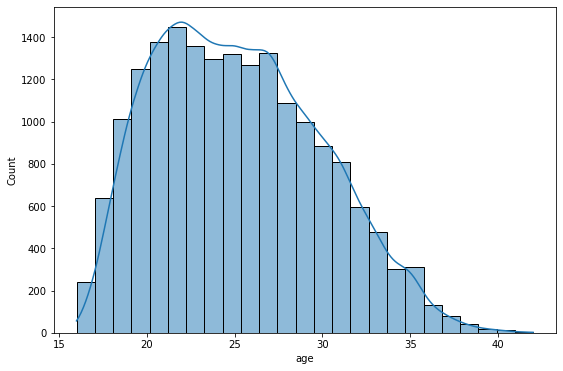

In [306]:
plt.figure(figsize = (9,6))
sns.histplot(df['age'],bins =25,kde =True);

**Our insights:**

1) Here we see that the age column in our dataset is slightly skewed towards the right. 

2) Also we observe that most of the players in our dataset in between the ages of 20 - 27.

#### Visualizing the distribution of common features of players

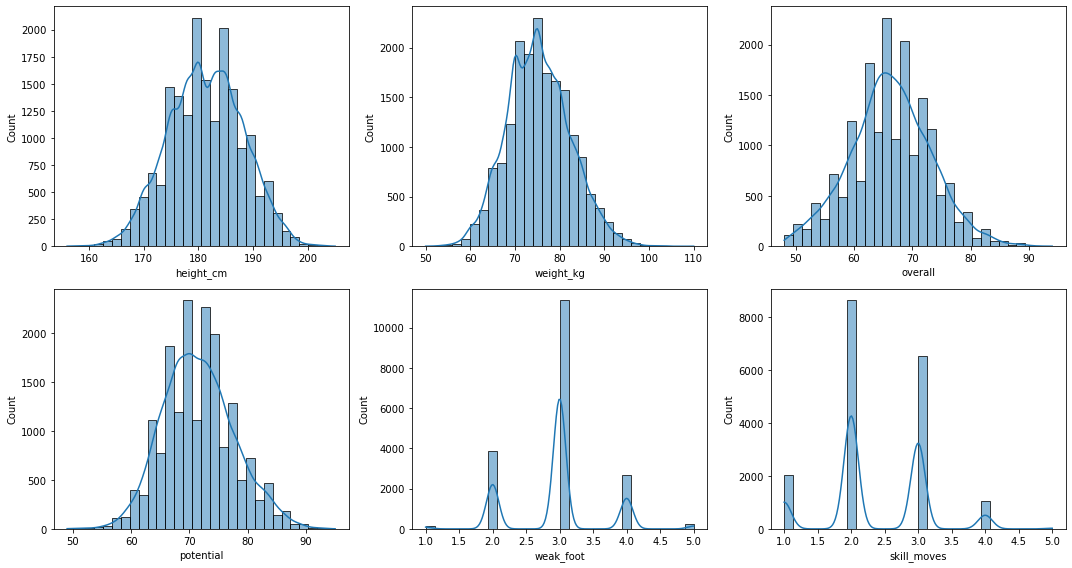

In [307]:
cols = ['height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'skill_moves']

# create a new dataframe with only the selected columns
df_selected = df[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col, bins=30, ax=axs[i],kde =True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


**Our insights:**

1) The 'height_cm', 'weight_kg', 'overall','potential' columns are having very little skew and looking more or less  normally distributed.
    
2) The 'weak_foot' and 'skill_moves' columns are categories that signifies a players ratings in that category. We see that most players have ratings 3 and 2 in weak_foot and skill_moves respectively.
    


#### Visualizing the distribution of income of players

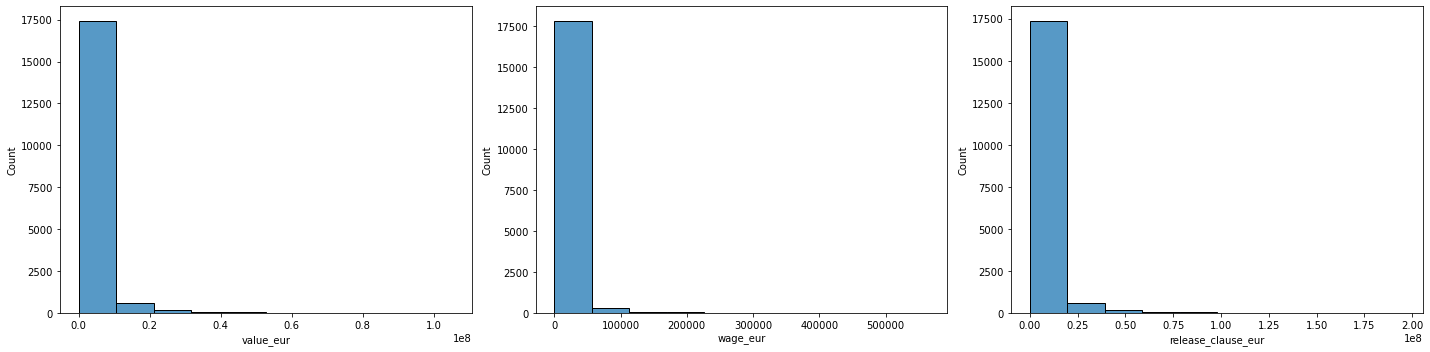

In [308]:
cols = ['value_eur','wage_eur','release_clause_eur']

# create a new dataframe with only the selected columns
df_selected = df[cols]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# plot histograms for each column
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col,bins = 10, ax=axs[i])
    axs[i].set_xlabel(col)
    

plt.tight_layout()
plt.show()

**Our insights:**

1) Here we see that the all these features are right skewed.

2) Most of the players in our dataset are earning (wage_eur) between 0 to 90000


#### Visualizing the distribution of skills of players

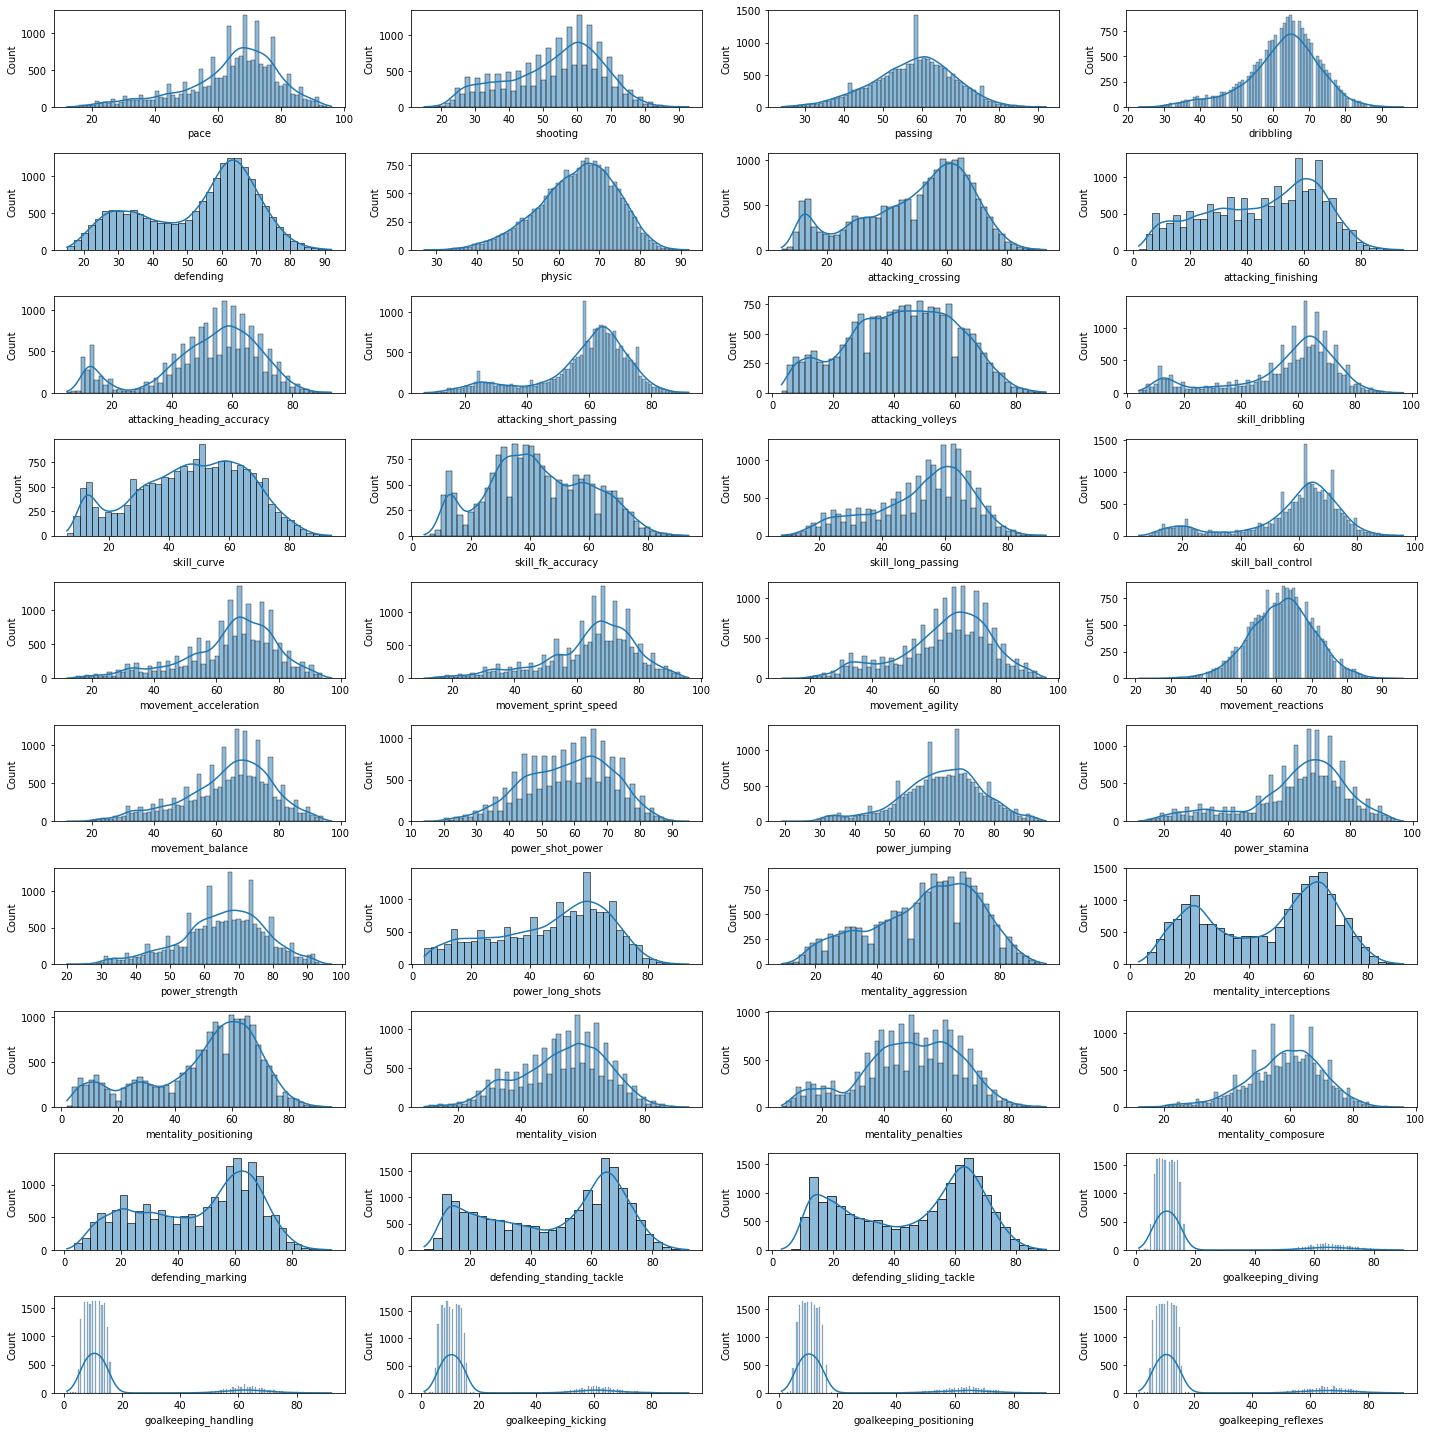

In [309]:
skills_cols = num_col.iloc[:, 12:]

skills = skills_cols.columns.tolist()

df_selected = df[skills]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(df_selected.columns):
    sns.histplot(data=df_selected, x=col, ax=axs[i], kde=True)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()



**Our insights:**

1) pace,shooting,passing,dribbling,physic,gk_diving, gk_handling,gk_positioning,gk_kicking,gk_reflexes, gk_speed, attacking_heading_accuracy, nation_jersy_number, attacking_volleys, skill_curve, skill_fk_accuracy, movement_reactions, movement_balance, power_shot_power, power_jumping, power_strenght, mentality_aggression, mentality_interception, mentality_vision, mentality_penalties, mentality_composure, these are the columns in dataset having slightly skewed distribution.

2) goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes these are the columns in the dataset having right skewed distribution.

3) defending, attacking_crossing, attacking_finishing, attacking_shot_passing, skill_dribbling, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility,power_stamina, power_long_shot, mentality_positioning, defending_marking, defending_standing_tackle, defending_sliding_tackle these are the columns in the dataset having left skewed distribution.


### Visualizing the categorical columns

In [310]:
cat_cols.head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3  https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4  https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   

                             long_name         dob nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2        Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                            Jan Oblak  1993-01-07    Slovenia   
4                          Eden Hazard  1991-01-07     Belgium   

                  club player_positions preferred_foot      work_rate  \
0         FC Barcelona       RW, CF, ST           Left     Medium/Low   
1             Juventus           ST, LW          Right       High/Low   
2  Paris Saint-Germain          LW, CAM          Right    High/Medium   
3      Atlético Madrid               GK          Right  Medium/Medium   
4          Real Madrid           LW, CF          Right    High/Medium   

    body_type real_face team_position    ls    st    rs    lw    lf    cf  \
0       Messi       Yes            RW  89+2  89+2  89+2  93+2  93+2  93+2   
1  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3  90+3  90+3   
2      Neymar       Yes           CAM  84+3  84+3  84+3  90+3  89+3  89+3   
3      Normal       Yes            GK     0     0     0     0     0     0   
4      Normal       Yes            LW  83+3  83+3  83+3  89+3  88+3  88+3   

     rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm  \
0  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2   
1  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3   
2  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3  66+3  61+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3     0     0     0     0     0     0     0     0  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3

In [311]:
uni_cat_col1 = df[['preferred_foot','work_rate','body_type','real_face']]
uni_cat_col = uni_cat_col1[(uni_cat_col1['body_type']=='Normal')|(uni_cat_col1['body_type']=='Lean')|(uni_cat_col1['body_type']=='Stocky')]
uni_cat_col.head(3)

preferred_foot      work_rate body_type real_face
3          Right  Medium/Medium    Normal       Yes
4          Right    High/Medium    Normal       Yes
5          Right      High/High    Normal       Yes

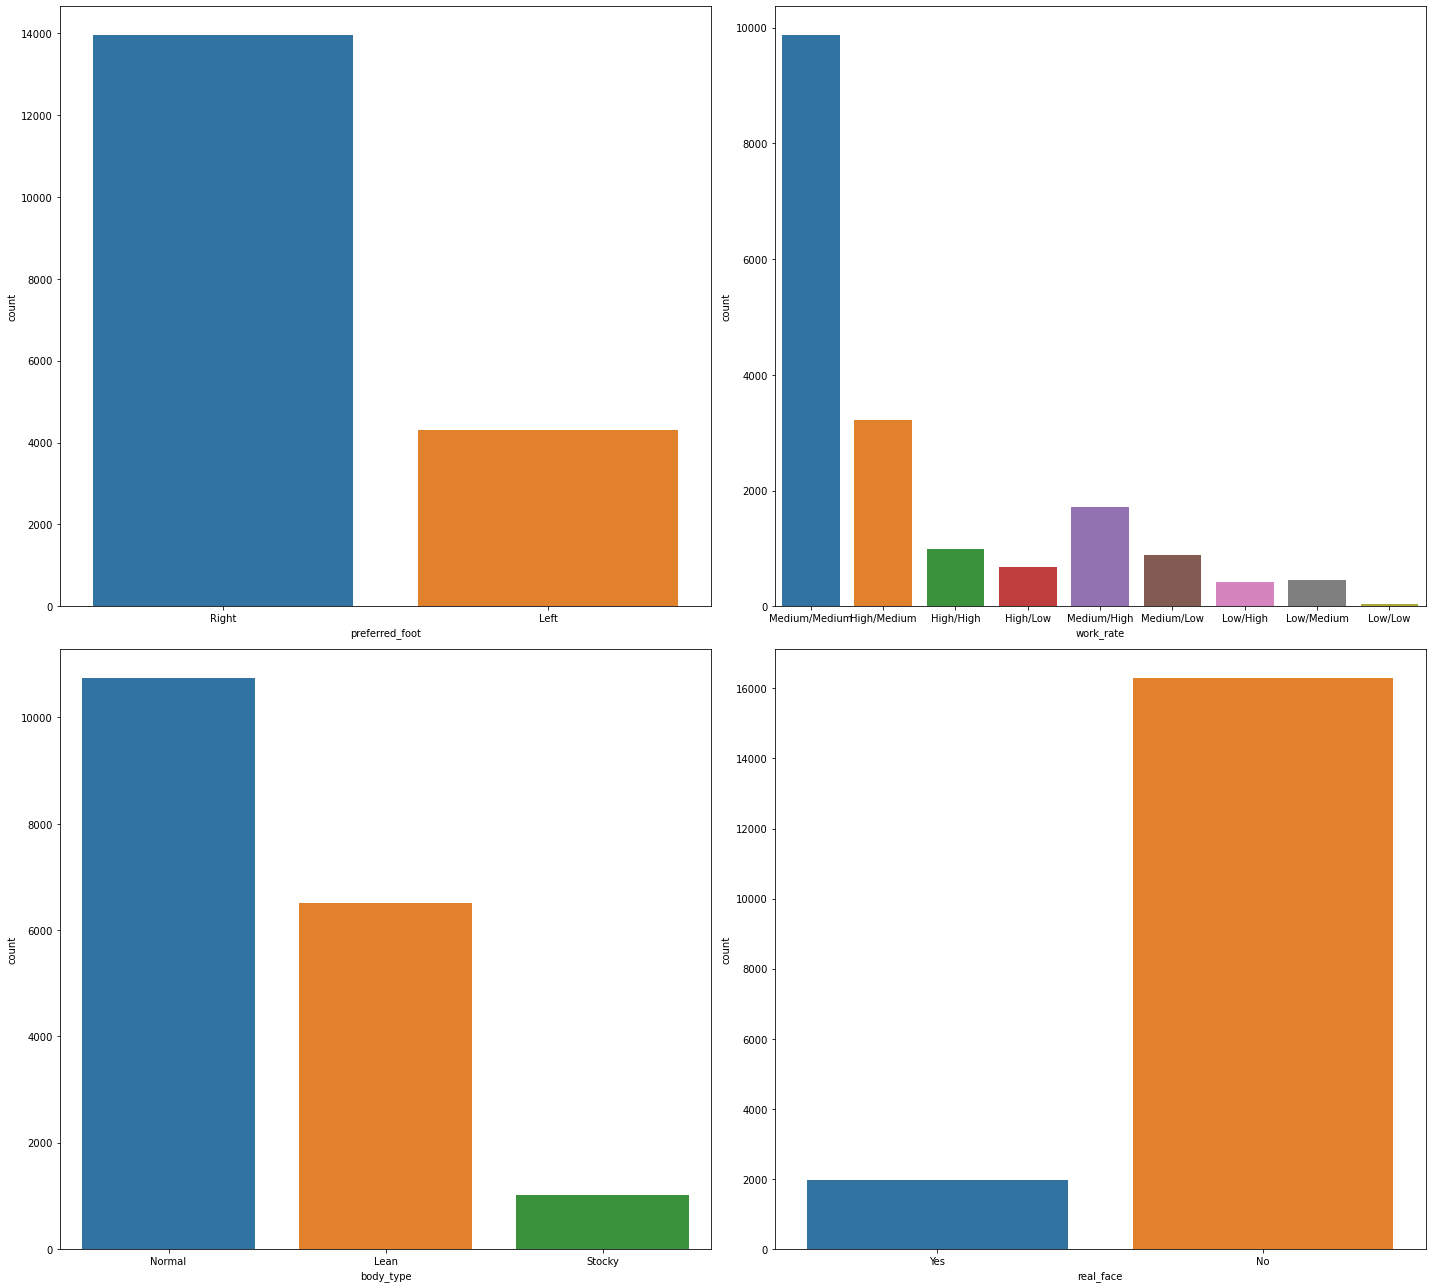

In [312]:
uni_cat_col1 = uni_cat_col.columns.to_list()

df_selected = uni_cat_col[uni_cat_col1]

# create subplots with matplotlib
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axs = axs.flatten()

# plot countplot for each feature
for i, col in enumerate(df_selected.columns):
    sns.countplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


**Our insights:**

1) Most of the players in our dataseet are right footed

2) Work_Rate of Medium/Medium has the highest number of observation amoung players in our dataset

3) Most of the players have a normal body type.

4) Real Face having 'NO' values the most.

## Bivariate Analysis

### Finding top 10 players in our dataset

In [313]:
top_ten = df.sort_values(by = 'overall', ascending=False)[:10]
ranking = [i for i in range(1, 11)]
player_names = top_ten['short_name'].values.tolist()

top_10_players = pd.DataFrame({'Ranking': ranking, 'Player': player_names})

top_10_players = top_10_players.set_index('Player')
top_10_players

Ranking
Player                    
L. Messi                 1
Cristiano Ronaldo        2
Neymar Jr                3
J. Oblak                 4
E. Hazard                5
K. De Bruyne             6
M. ter Stegen            7
V. van Dijk              8
L. Modrić                9
M. Salah                10

### Visualizing the top 10 players with most overall rating and potential rating

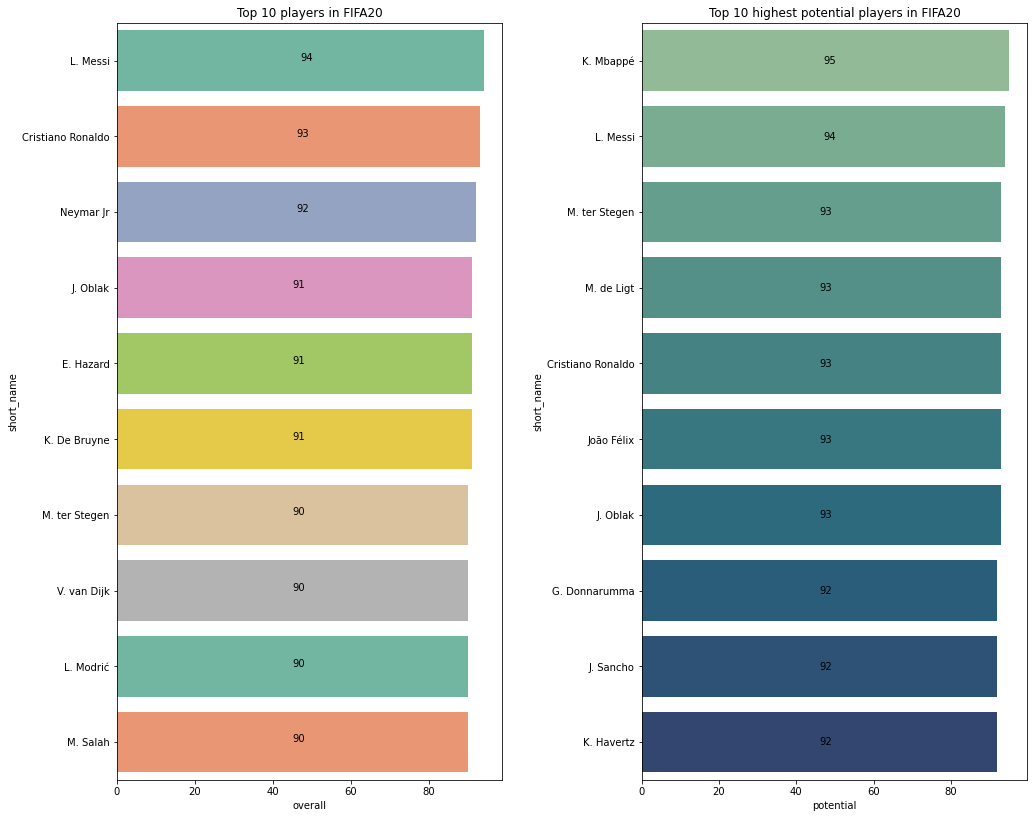

In [314]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_players = df[['short_name', 'overall']][:10]
plt.title("Top 10 players in FIFA20")
sns.barplot(y = top_players.short_name, x = top_players.overall, palette="Set2")
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)
def plot_top20(dataframe, metric):
    metric_df = data[['short_name', metric]].sort_values(by = [metric], ascending = False)[:10]
    plt.title(f"Top 10 highest {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_top20(data, 'potential')

plt.tight_layout(pad=3.0)

**Our Insights:**

Here we see that Leonel Messi and Cristiano Ronaldo has the highest overall rating.

On the other hand, Mbappe and Messi are the highest potential rated players

### Visualizing the bottom 10 players with least overall rating and potential rating

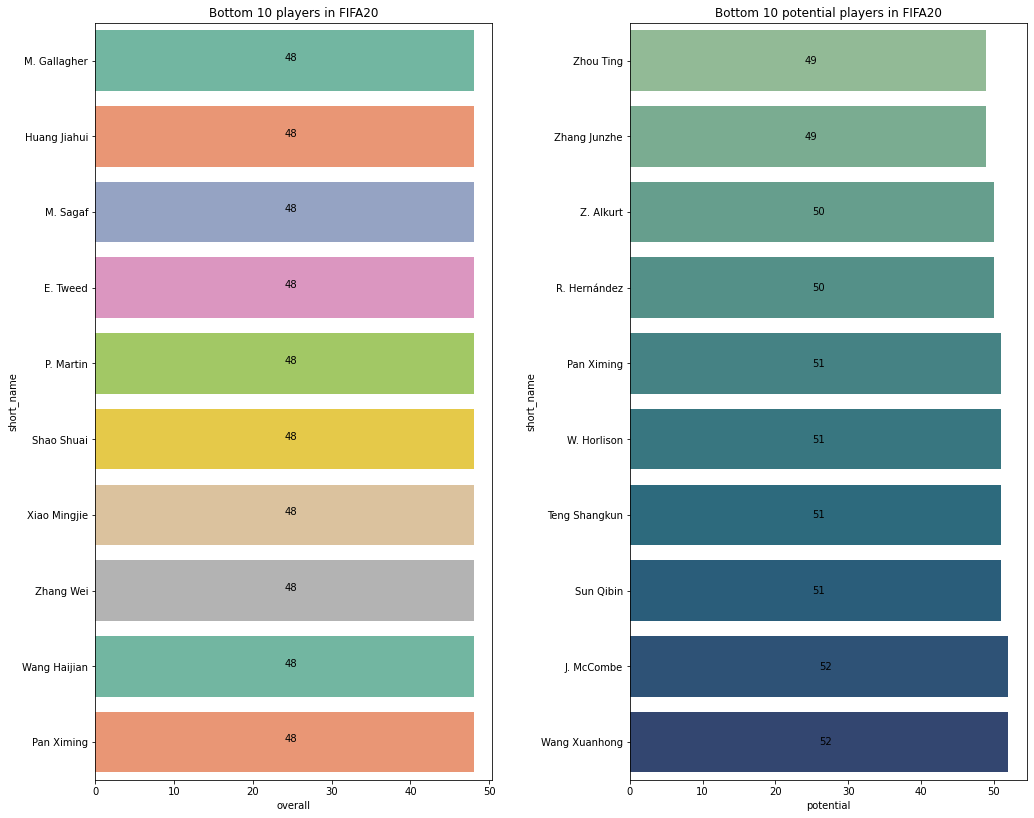

In [315]:
plt.figure(figsize=(15,12))
plt.subplot(121)
low_players = data[['short_name', 'overall']][-10:]
plt.title("Bottom 10 players in FIFA20")
sns.barplot(y = low_players.short_name, x = low_players.overall, palette="Set2")
for index, value in enumerate(low_players.overall):
    plt.text(value//2, index, str(value))
    
plt.subplot(122)
def plot_last20(dataframe, metric):
    metric_df = data[['short_name', metric]].sort_values(by = [metric], ascending = True)[:10]
    plt.title(f"Bottom 10 {metric} players in FIFA20")
    sns.barplot(y = metric_df.short_name, x = metric_df[metric], palette="crest")
    for index, value in enumerate(metric_df[metric]):
        plt.text(value//2, index, str(round(value,2)), verticalalignment='center')
plot_last20(data, 'potential')

plt.tight_layout(pad=3.0)

**Our Insights:**

Bottom 43 players are having the lowest overall rating of 48.

Zhou Ting and Zhang Junzhe are having the lowest potential rating of 49.

### Finding which nation are producing the top ten players

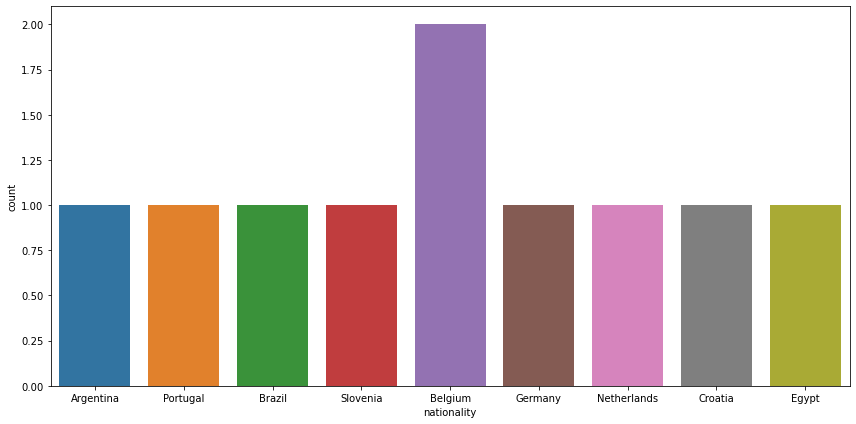

In [316]:
plt.figure(figsize = (12,6))
sns.countplot(top_ten['nationality'])

plt.tight_layout()

**Our Insights:**

We see that Belgium is producing two players in our top ten players dataset

### Finding out the income of our top ten players

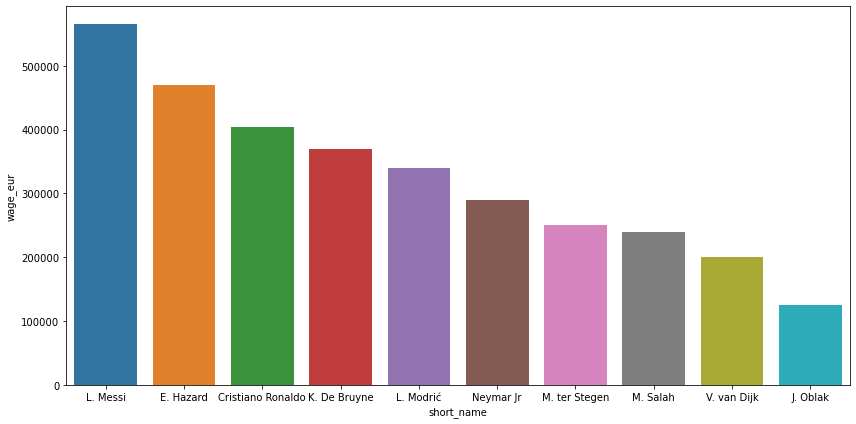

In [317]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='wage_eur',ascending=False),x = 'short_name',y = 'wage_eur')
plt.tight_layout()

**Our Insights:**

Here we see that Lionel Messi is getting paid the most.

### Finding the shooting capabilities of our top ten players

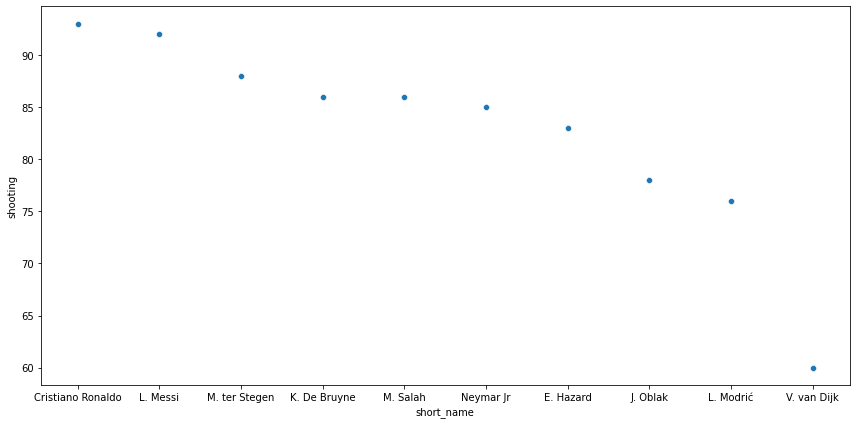

In [318]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = top_ten.sort_values(by='shooting',ascending=False),x = 'short_name',y = 'shooting')
plt.tight_layout()

**Our Insights:**

Here we see that unsuprizingly Cristiano Ronaldo has the top rating for shooting capabilities

### Finding the dribbling capabilities of our top ten players

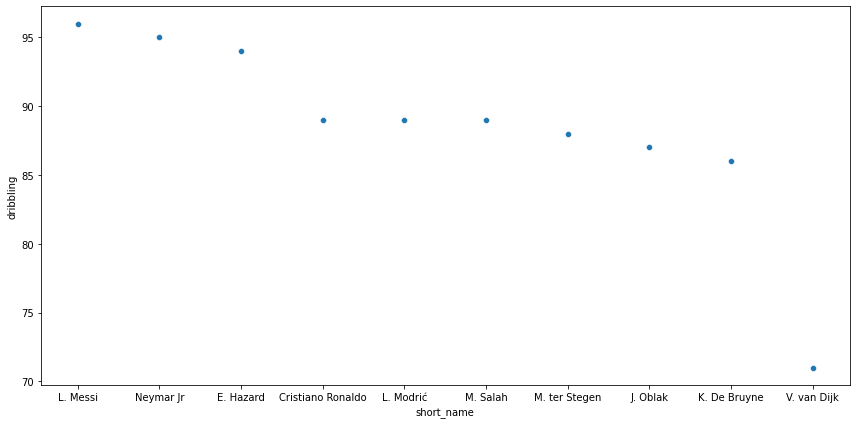

In [319]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = top_ten.sort_values(by='dribbling',ascending=False),x = 'short_name',y = 'dribbling')
plt.tight_layout()

**Our Insights:**

Here we see that Lionel Messi has the top rating for dribbling capabilities

### Finding the attacking finishing capabilities of our top ten players

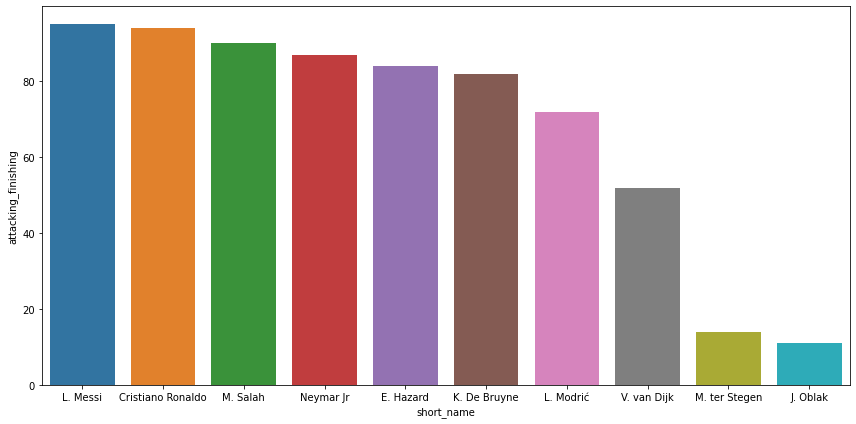

In [320]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_ten.sort_values(by='attacking_finishing',ascending=False),x = 'short_name',y = 'attacking_finishing')
plt.tight_layout()

**Our Insights:**

Here we see that Lionel Messi has the top rating for attacking finishing capabilities

### Finding the highest paid offensive players

In [321]:
fifa_df = df
fifa_df = fifa_df.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
def find_most_earnings_player(position):
    forwards_df = fifa_df[(df["team_position"] == 'LW') | (fifa_df["team_position"] == 'RW')| (fifa_df["team_position"] == 'ST')]
    name = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][2]
    wage = forwards_df[forwards_df["team_position"] == position].sort_values(by='wage_eur',ascending=False).iloc[0][12]
    if position == 'LW':
        position = 'left winger'
    elif position == 'ST':
        position = 'striker'
    else:
        position = 'right winger'
    print(f'{name} is highest paid {position} with a wage of {wage} euros')

In [322]:
find_most_earnings_player('LW')

Eden Hazard is highest paid left winger with a wage of 470000 euros


In [323]:
find_most_earnings_player('RW')

Lionel Andrés Messi Cuccittini is highest paid right winger with a wage of 565000 euros


In [324]:
find_most_earnings_player('ST')

Luis Alberto Suárez Díaz is highest paid striker with a wage of 355000 euros


### Finding the potential of the players with respect to their age.

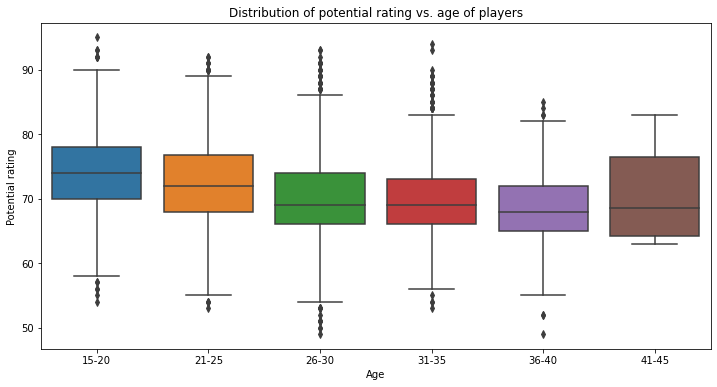

In [325]:
plt.figure(figsize = (12,6))
sns.boxplot(fifa_df["Age Group"], fifa_df["potential"])
plt.xlabel("Age")
plt.ylabel("Potential rating")
plt.title("Distribution of potential rating vs. age of players")
plt.show()

**Our Insights:**

Here we may conclude that the more the aged the player become the more they lose their potential.

### Finding the relationship between overall & potential rating of the player with respect to how much they earn

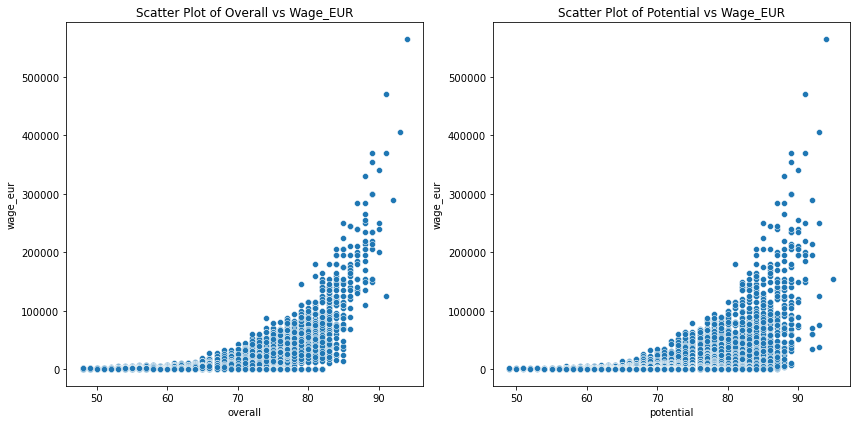

In [326]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data =df,x = 'overall', y = 'wage_eur', ax=ax1)
ax1.set_title("Scatter Plot of Overall vs Wage_EUR")

sns.scatterplot(data =df,x = 'potential', y = 'wage_eur', ax=ax2)
ax2.set_title("Scatter Plot of Potential vs Wage_EUR")
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


**Our Insights:**

Here we see that there exists a positive correlation between overall/potential rating with respect to players income

### Finding the top 10 clubs and top 10 coutries with respect to overall ratings of the players

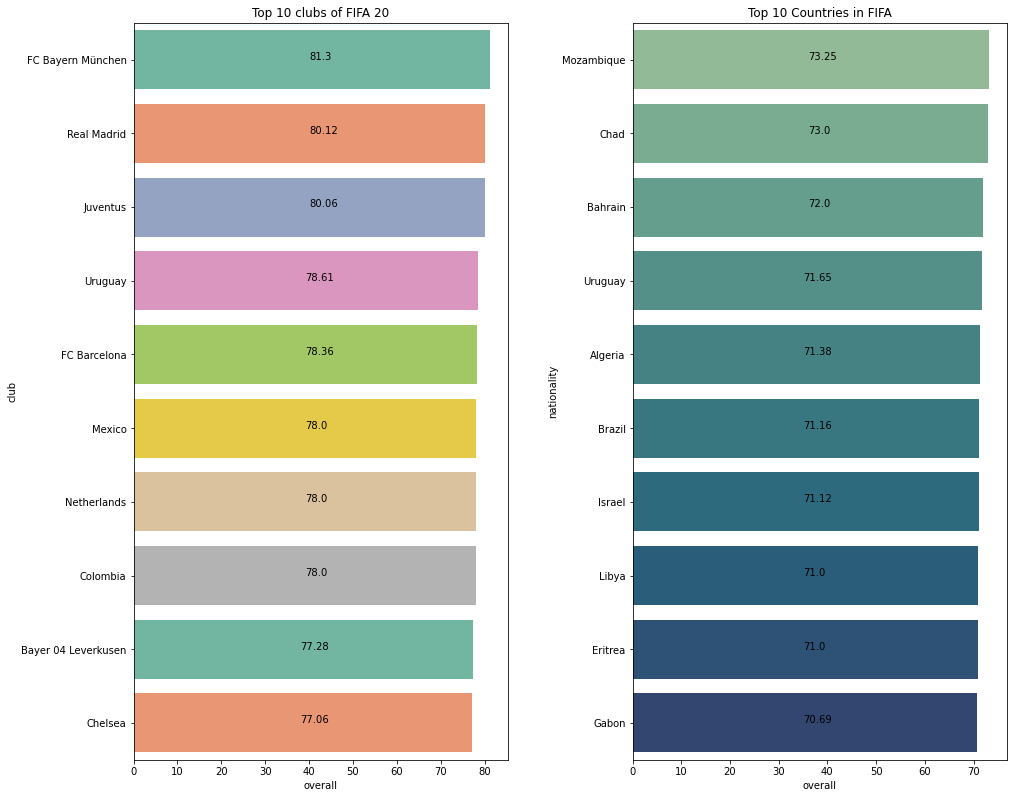

In [327]:
plt.figure(figsize=(15,12))
plt.subplot(121)
top_club=data.groupby(['club']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 clubs of FIFA 20')
sns.barplot(x=top_club,y=top_club.index,palette='Set2')
for index,value in enumerate(top_club):
    plt.text(value//2, index, str(round(value,2)))

plt.subplot(122)

top_country=data.groupby(['nationality']).overall.mean().sort_values(ascending=False)[:10]
plt.title('Top 10 Countries in FIFA')
sns.barplot(y=top_country.index,x=top_country,palette='crest')
for index, value in enumerate(top_country):
    plt.text(value//2,index,str(round(value,2)))


plt.tight_layout(pad=4.0)


**Our Insights:**

1) FC bayern munchen is the top football club in the world with overall avg rating with 81.3.

2) Mozombique is the top country with avg overall rating of players with 73.25.

### Visualizing the relationship of a players' international reputation vs their overall rating

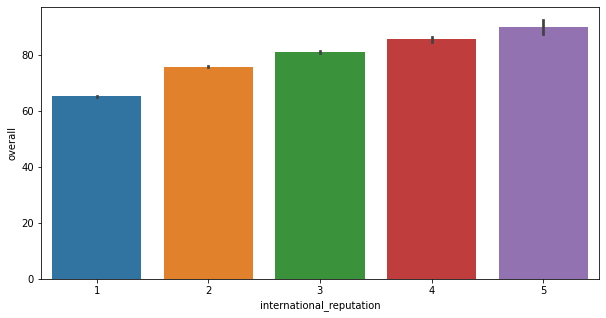

In [328]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='international_reputation',y='overall')
plt.show()

In [329]:
IR=data.groupby(['international_reputation']).overall.mean()
IR

international_reputation
1    65.273133
2    75.835965
3    81.157534
4    85.586957
5    90.166667
Name: overall, dtype: float64

**Our Insights:**
1) The players having 5 international_reputation will have overall rating on an avg of 90.166

2) The players having 1 international_reputation will have overall rating on an avg of 65.27

### Visualizing the relationship of a players preferred foot vs their overall rating

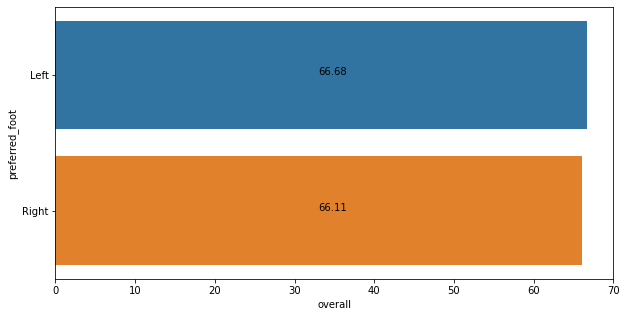

In [330]:
plt.figure(figsize=(10,5))
pf=data.groupby(['preferred_foot']).overall.mean()
sns.barplot(x=pf,y=pf.index)
for index,value in enumerate(pf):
    plt.text(value//2, index,str(round(value,2)))
plt.show()

**Our Insights:**
    
Left footed players have the average overall of 66.68, whereas right footed players have the average overall of 66.11.

## Comparing Lionel Messi and Cristiano Ronaldo capabilities

In [331]:
messi_ronaldo_df = df[(df['short_name']=='L. Messi') | (df['short_name']=='Cristiano Ronaldo')]
messi_ronaldo_df

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   

                             long_name  age         dob  height_cm  weight_kg  \
0       Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   
1  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05        187         83   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   
1    Portugal      Juventus       93         93   58500000    405000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   

   skill_moves   work_rate   body_type real_face  release_clause_eur  \
0            4  Medium/Low       Messi       Yes         195800000.0   
1            5    High/Low  C. Ronaldo       Yes          96500000.0   

  team_position  jersey_number  pace  shooting  passing  dribbling  defending  \
0            RW           10.0  87.0      92.0     92.0       96.0       39.0   
1            LW            7.0  90.0      93.0     82.0       89.0       35.0   

   physic  attacking_crossing  attacking_finishing  \
0    66.0                  88                   95   
1    78.0                  84                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
0                       14                     8  89+2  89+2  89+2  93+2   
1                       14                    11  91+3  91+3  91+3  89+3   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   
1  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  68+2  

#### Visualizing the capabilities of Messi & Ronaldo

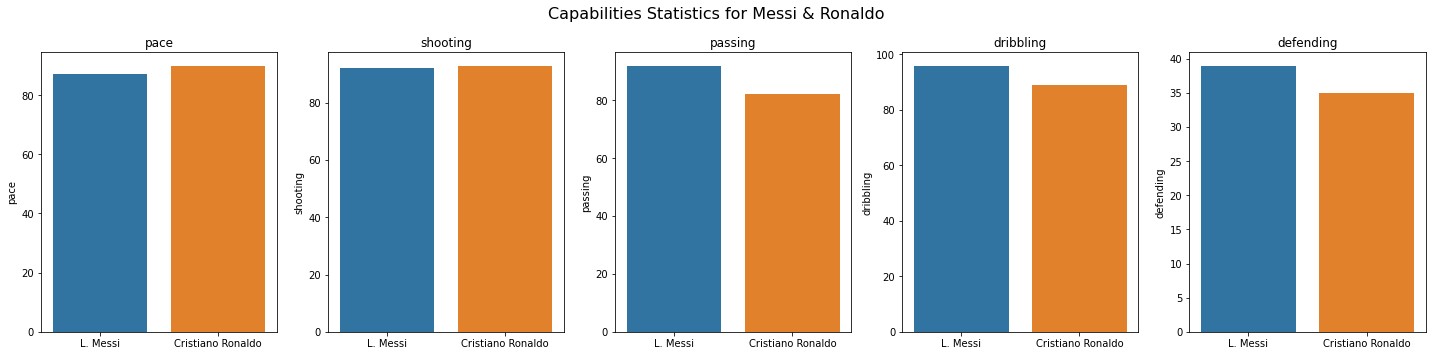

In [332]:
capabilities = ['pace', 'shooting', 'passing', 'dribbling', 'defending']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, capability in enumerate(capabilities):
    sns.barplot(data = messi_ronaldo_df, x = messi_ronaldo_df['short_name'], y = messi_ronaldo_df[capability], ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(capability)
    ax[i].set_title(capability)
plt.suptitle("Capabilities Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()


**Our Insights:**

In the general capabilities section we see that Messi and Ronaldo are both performing exceptionally well

#### Visualizing the attacking capabilities of Messi & Ronaldo

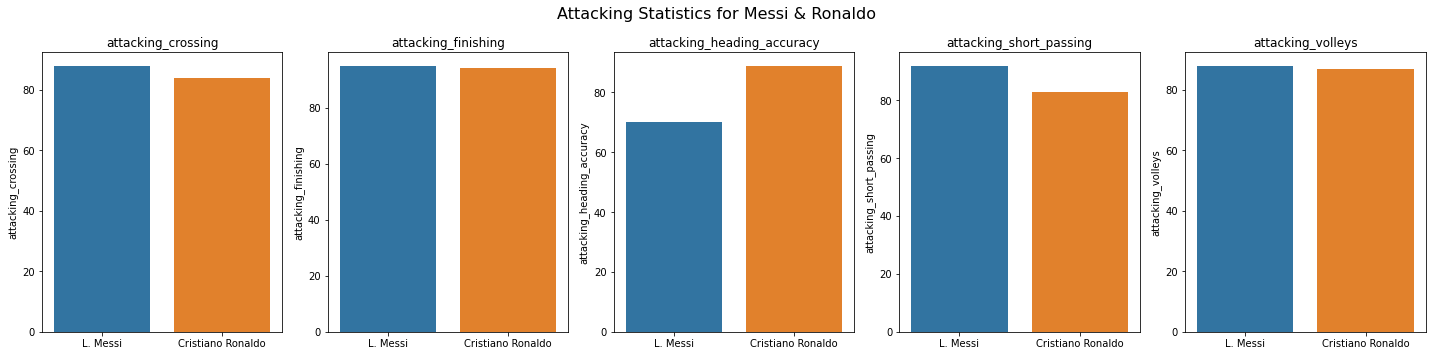

In [333]:
attacking_stats = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                   'attacking_short_passing','attacking_volleys']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(attacking_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Attacking Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()


**Our Insights:**

In the attacking capabilities section we see that Ronaldo is leading Messi in heading accuracy and Messi is better at crossing than Ronaldo

#### Visualizing the skills of Messi & Ronaldo

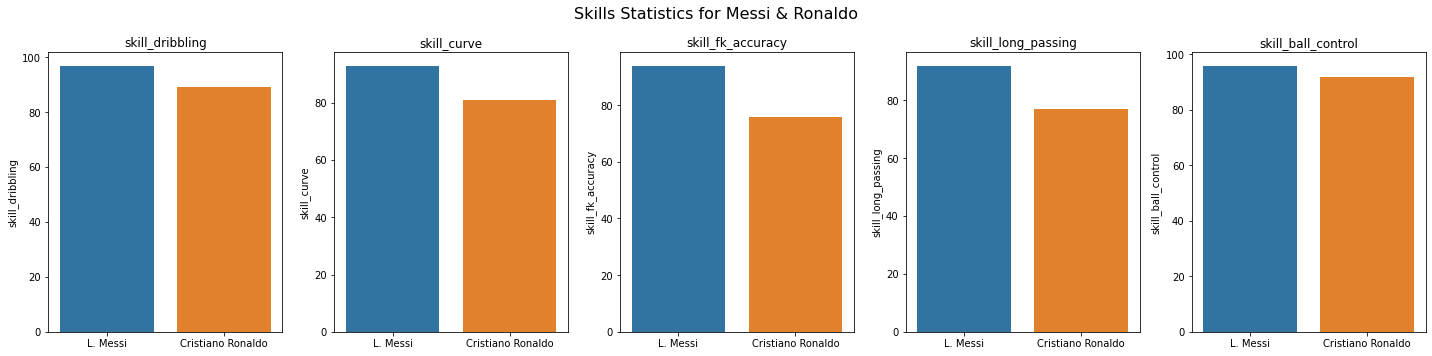

In [334]:
skill_stats = ['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']
names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(skill_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Skills Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()

**Our Insights:**

In the skills section we see that Messi leads Ronaldo in almost all departments

#### Visualizing the power capabilities of Messi & Ronaldo

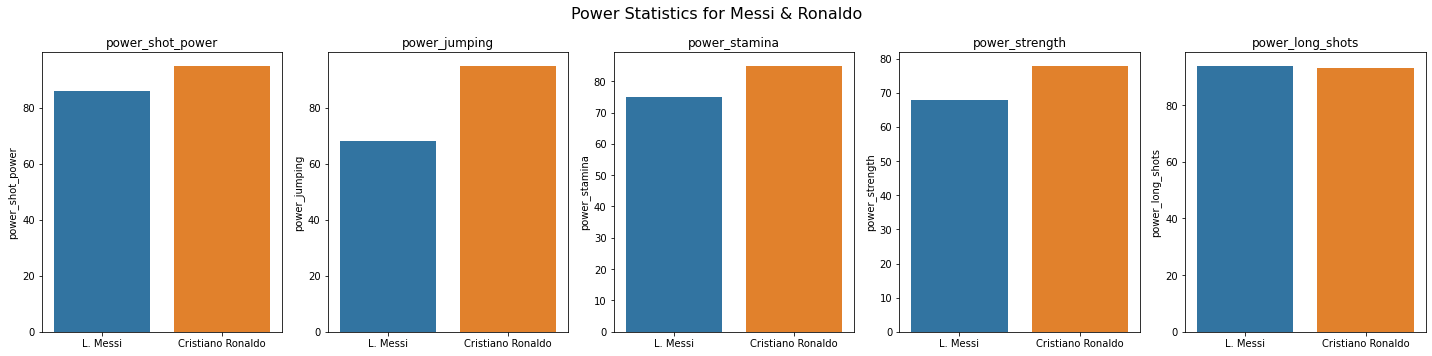

In [335]:
power_stats = ['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']

names = ['L. Messi', 'Cristiano Ronaldo']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, stat in enumerate(power_stats):
    sns.barplot(data=messi_ronaldo_df, x='short_name', y=stat, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel(stat)
    ax[i].set_title(stat)
plt.suptitle("Power Statistics for Messi & Ronaldo", fontsize=16)
plt.tight_layout()
plt.show()


**Our Insights:**

In the power capabilities section we see that Ronaldo is leading Messi in most departments

## Finding the important features in our dataset

#### Numerical Columns important features

In [336]:
num_col.head(2)

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  \
0                         5          4            4         195800000.0   
1                         5          4            5          96500000.0   

   jersey_number  pace  shooting  passing  dribbling  defending  physic  \
0           10.0  87.0      92.0     92.0       96.0       39.0    66.0   
1            7.0  90.0      93.0     82.0       89.0       35.0    78.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   

   goalkeeping_reflexes  
0                     8  
1                    11

In [337]:
imp_feats = num_col.corr()["overall"].sort_values()[40:-1].index.tolist()
imp_feat_df = df[imp_feats]
num_imp_feat_df = pd.concat([imp_feat_df,df['overall']],axis =1)
num_imp_feat_df.head(3)

mentality_vision  physic  power_shot_power  wage_eur  release_clause_eur  \
0                94    66.0                86    565000         195800000.0   
1                82    78.0                95    405000          96500000.0   
2                90    58.0                80    290000         195200000.0   

   dribbling  value_eur  potential  passing  mentality_composure  \
0       96.0   95500000         94     92.0                   96   
1       89.0   58500000         93     82.0                   95   
2       95.0  105500000         92     87.0                   94   

   movement_reactions  overall  
0                  95       94  
1                  96       93  
2                  92       92

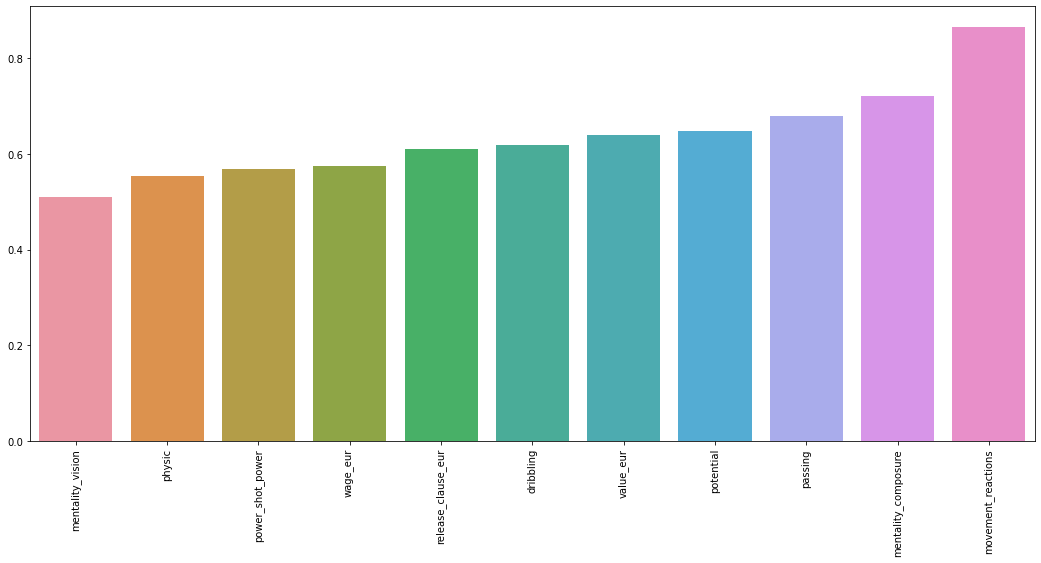

In [338]:
plt.figure(figsize=(18,8))
sns.barplot(x= num_col.corr()["overall"].sort_values()[40:-1].index,y = num_col.corr()["overall"].sort_values()[40:-1].values)
plt.xticks(rotation = 90);

**Our Insights:**

Here we have captured that the features like 'movement_reactions' and 'mentality_composure' are highly correlated with overall rating of the players.

## Data Preprocessing

#### Preprocessing Numercal Data First

In [339]:
num_col.shape

(18278, 52)

#### Removing the Highly correlated columns that is more than 90%.

In [340]:
cor_matrix = num_col.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
num_col = num_col.drop(to_drop, axis=1)

In [341]:
num_col.shape

(18278, 40)

#### Handling outliers

In [342]:
cols = num_col.columns.tolist()

df_selected = df[cols]

In [343]:
df_selected

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0       32        170         72       94         94   95500000    565000   
1       34        187         83       93         93   58500000    405000   
2       27        175         68       92         92  105500000    290000   
3       26        188         87       91         93   77500000    125000   
4       28        175         74       91         91   90000000    470000   
...    ...        ...        ...      ...        ...        ...       ...   
18273   22        186         79       48         56      40000      2000   
18274   22        177         66       48         56      40000      2000   
18275   19        186         75       48         56      40000      1000   
18276   18        185         74       48         54      40000      1000   
18277   26        182         78       48         51      40000      2000   

       international_reputation  weak_foot  skill_moves  jersey_number  pace  \
0                             5          4            4           10.0  87.0   
1                             5          4            5            7.0  90.0   
2                             5          5            5           10.0  91.0   
3                             3          3            1            1.0  52.0   
4                             4          4            4           10.0  91.0   
...                         ...        ...          ...            ...   ...   
18273                         1          3            2           36.0  57.0   
18274                         1          2            2           31.0  58.0   
18275                         1          2            2           38.0  54.0   
18276                         1          2            2           33.0  59.0   
18277                         1          3            2           37.0  60.0   

       shooting  passing  dribbling  defending  physic  attacking_crossing  \
0          92.0     92.0       96.0       39.0    66.0                  88   
1          93.0     82.0       89.0       35.0    78.0                  84   
2          85.0     87.0       95.0       32.0    58.0                  87   
3          78.0     90.0       87.0       89.0    92.0                  13   
4          83.0     86.0       94.0       35.0    66.0                  81   
...         ...      ...        ...        ...     ...                 ...   
18273      23.0     28.0       33.0       47.0    51.0                  21   
18274      24.0     33.0       35.0       48.0    48.0                  24   
18275      35.0     44.0       45.0       48.0    51.0                  32   
18276      35.0     47.0       47.0       45.0    52.0                  39   
18277      32.0     51.0       45.0       47.0    55.0                  44   

       attacking_finishing  attacking_heading_accuracy  \
0                       95                          70   
1                       94                          89   
2                       87                          62   
3                       11                          15   
4                       84                          61   
...                    ...                         ...   
18273                   17                          40   
18274                   20                          42   
18275                   33                          49   
18276                   34                          47   
18277                   30                          48   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
0                           92                 88               97   
1                           83                 87               89   
2                           87                 87               96   
3                           43                 13               12   
4                           89                 83               95   
...                        ...                ...              ... 

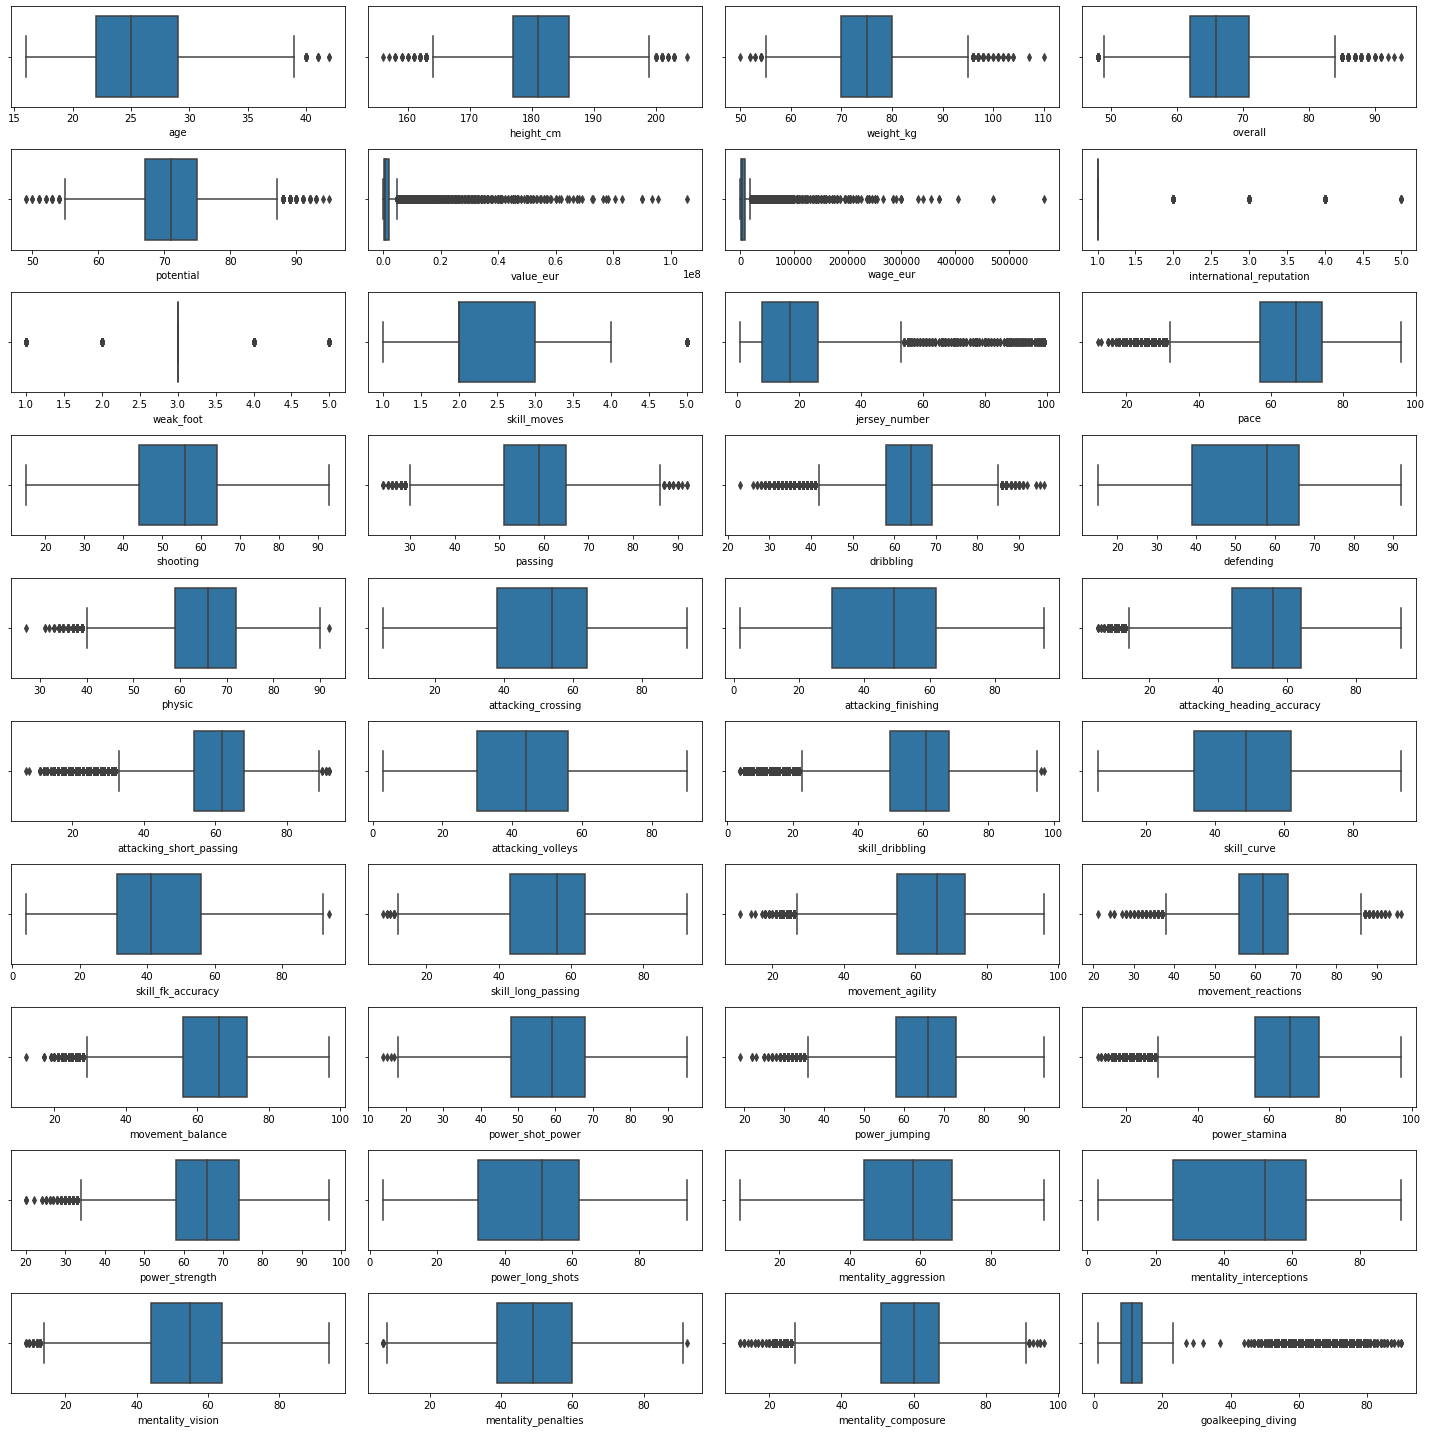

In [344]:
# create subplots with matplotlib
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(20, 20))
axs = axs.flatten()

# plot histograms for each feature
for i, col in enumerate(df_selected.columns):
    sns.boxplot(data=df_selected, x=col, ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [345]:
# Creating a function to fix outliers
def handle_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df


In [346]:
df2 = handle_outliers(num_col)

#### After Handling outliers we plot the boxplot again

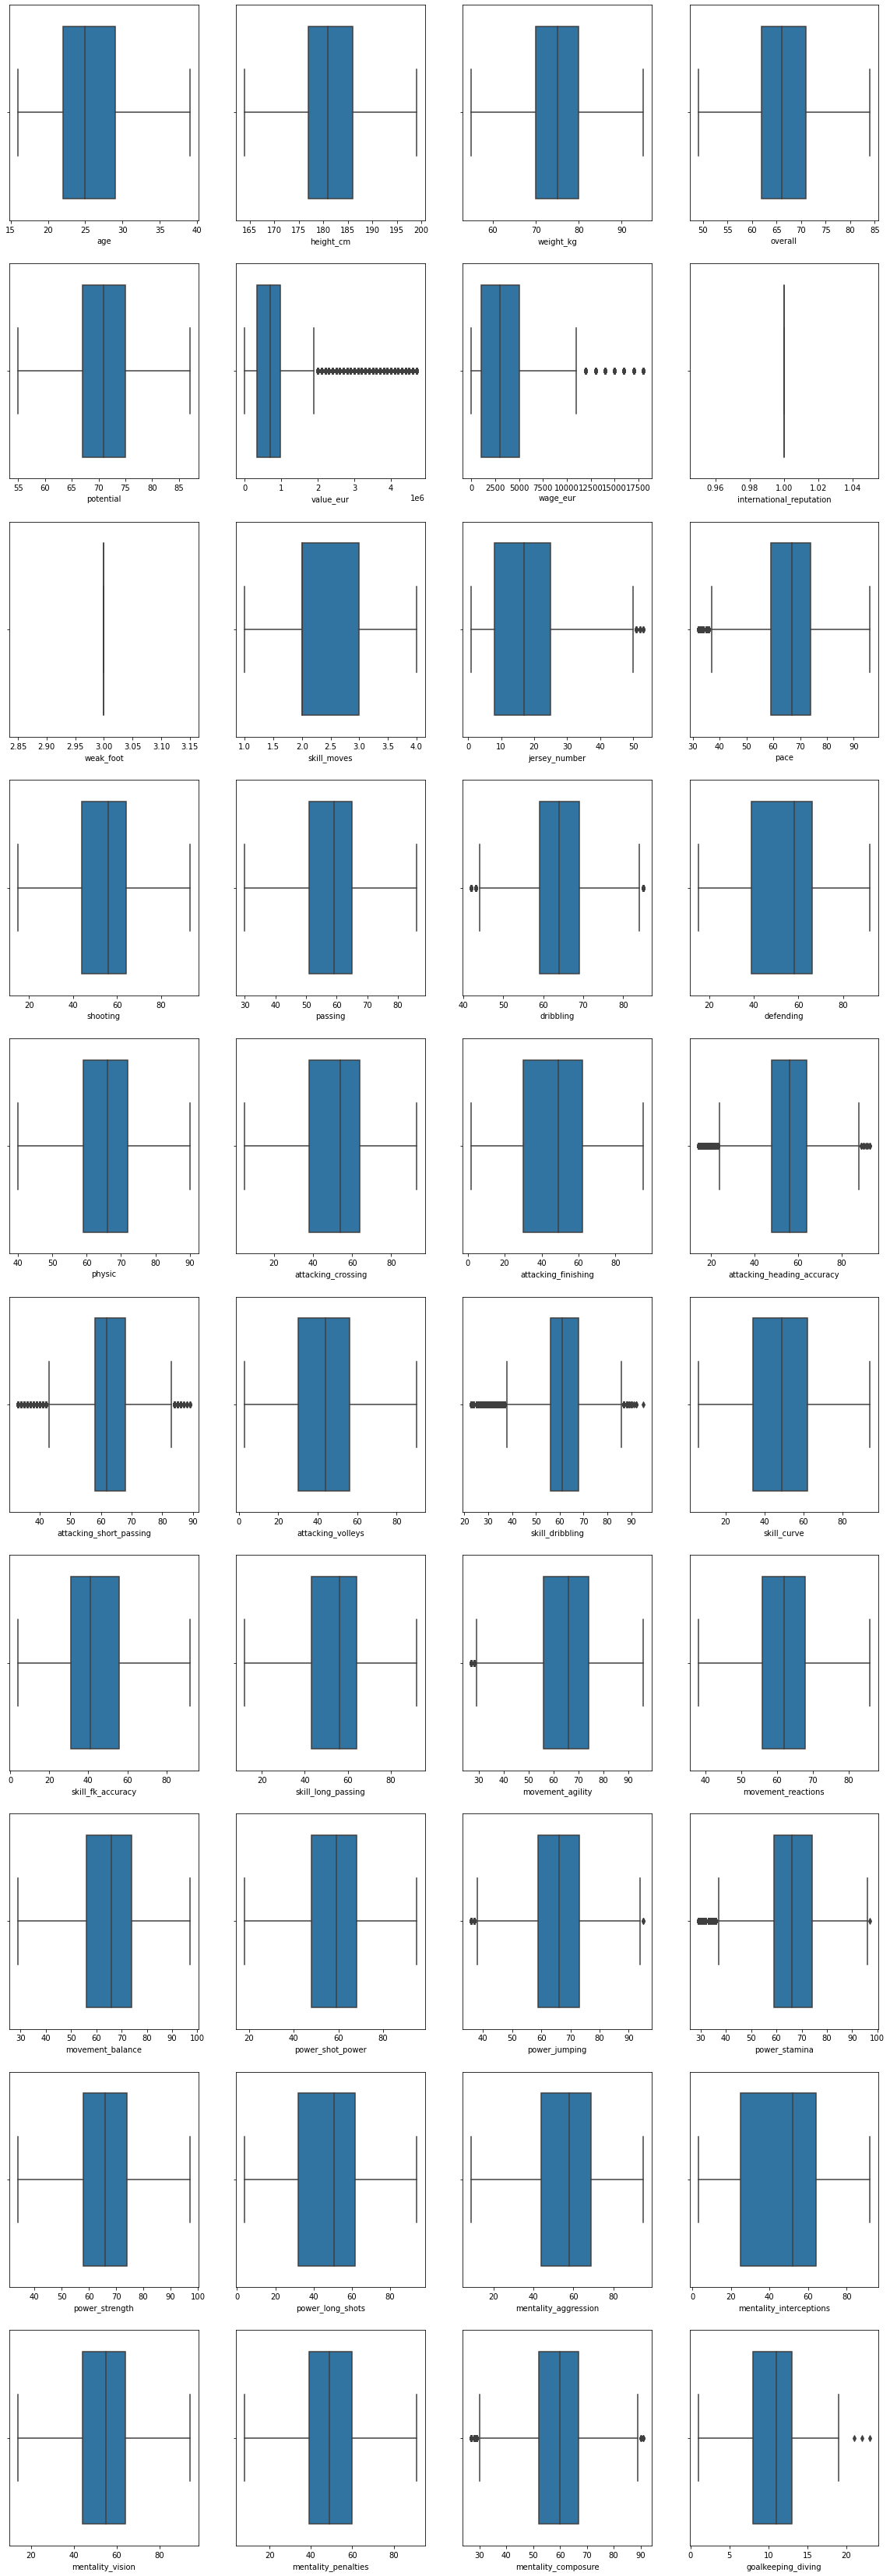

In [347]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for columns in df2:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.boxplot(x=columns,data=df2)
        plotnumber+=1
plt.show()

#### Categorical Columns important features

In [348]:
cat_cols1 = cat_cols.iloc[:, 4:]
cat_cols1=pd.concat([cat_cols1,num_col['overall']],axis=1)
cat_cols1.head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type real_face team_position    ls    st    rs    lw  \
0     Medium/Low       Messi       Yes            RW  89+2  89+2  89+2  93+2   
1       High/Low  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3   
2    High/Medium      Neymar       Yes           CAM  84+3  84+3  84+3  90+3   
3  Medium/Medium      Normal       Yes            GK     0     0     0     0   
4    High/Medium      Normal       Yes            LW  83+3  83+3  83+3  89+3   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   
1  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3   
2  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  overall  
0  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2     66.0  
1  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3     66.0  
2  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3     66.0  
3     0     0     0     0     0     0     0     0     0     0     66.0  
4  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3     66.0

**Our Stategies to handle the categorical features:**


We will rename the short form columns like 'ls', 'st' to their full form for our better understanding.

We see that in these various postions columns the values given are for example 89+2. Here 89 is the overall rating and 89+2=91 is the potential rating.

We will derive the values as the first part of the value as overall and the second part of the value after '+' sign as potential value.

In [349]:
positions = {'ls': 'Left Striker',
                    'st': 'Striker',
                    'rs': 'Right Striker',
                    'lw': 'Left Winger',
                    'lf': 'Left Forward',
                    'cf': 'Center Forward',
                    'rf': 'Right Forward',
                    'rw': 'Right Winger',
                    'lam': 'Left Attacking Midfielder',
                    'cam': 'Center Attacking Midfielder',
                    'ram': 'Right Attacking Midfielder',
                    'lm': 'Left Midfielder',
                    'lcm': 'Left Center Midfielder',
                    'cm': 'Center Midfielder',
                    'rcm': 'Right Center Midfielder',
                    'rm': 'Right Midfielder',
                    'lwb': 'Left Wing Back',
                    'ldm': 'Left Defensive Midfielder',
                    'cdm': 'Center Defensive Midfielder',
                    'rdm': 'Right Defensive Midfielder',
                    'rwb': 'Right Wing Back',
                    'lb': 'Left Back',
                    'lcb': 'Left Center Back',
                    'cb': 'Center Back',
                    'rcb': 'Right Center Back',
                    'rb': 'Right Back'}

cat_cols1 = cat_cols1.rename(columns=positions)

#### Handing the various postions columns with its overall + potential rating in our dataset

In [350]:
# Define the position columns to split
pos_cols = ['Left Striker', 'Striker', 'Right Striker', 'Left Winger', 'Left Forward','Center Forward', 'Right Forward', 
             'Right Winger', 'Left Attacking Midfielder','Center Attacking Midfielder', 'Right Attacking Midfielder', 
             'Left Midfielder','Left Center Midfielder', 'Center Midfielder', 'Right Center Midfielder',
             'Right Midfielder', 'Left Wing Back', 'Left Defensive Midfielder','Center Defensive Midfielder',
             'Right Defensive Midfielder', 'Right Wing Back','Left Back', 'Left Center Back', 'Center Back',
             'Right Center Back', 'Right Back']

# Split the position columns into separate columns for overall and potential ratings
for col in pos_cols:
    cat_cols1[[col+'_overall', col+'_potential']] = cat_cols1[col].str.split('+', expand=True)
    
    # Convert the new columns to numeric data types
    cat_cols1[col+'_overall'] = pd.to_numeric(cat_cols1[col+'_overall'])
    cat_cols1[col+'_potential'] = pd.to_numeric(cat_cols1[col+'_potential'])
    cat_cols1[col+'_potential'] = cat_cols1[col+'_overall'] + cat_cols1[col+'_potential'] 

# Drop the original position columns
cat_cols1.drop(pos_cols, axis=1, inplace=True)


In [351]:
cat_cols1.head(2)

nationality          club player_positions preferred_foot   work_rate  \
0   Argentina  FC Barcelona       RW, CF, ST           Left  Medium/Low   
1    Portugal      Juventus           ST, LW          Right    High/Low   

    body_type real_face team_position  overall  Left Striker_overall  \
0       Messi       Yes            RW     66.0                  89.0   
1  C. Ronaldo       Yes            LW     66.0                  91.0   

   Left Striker_potential  Striker_overall  Striker_potential  \
0                    91.0             89.0               91.0   
1                    94.0             91.0               94.0   

   Right Striker_overall  Right Striker_potential  Left Winger_overall  \
0                   89.0                     91.0                 93.0   
1                   91.0                     94.0                 89.0   

   Left Winger_potential  Left Forward_overall  Left Forward_potential  \
0                   95.0                  93.0                    95.0   
1                   92.0                  90.0                    93.0   

   Center Forward_overall  Center Forward_potential  Right Forward_overall  \
0                    93.0                      95.0                   93.0   
1                    90.0                      93.0                   90.0   

   Right Forward_potential  Right Winger_overall  Right Winger_potential  \
0                     95.0                  93.0                    95.0   
1                     93.0                  89.0                    92.0   

   Left Attacking Midfielder_overall  Left Attacking Midfielder_potential  \
0                               93.0                                 95.0   
1                               88.0                                 91.0   

   Center Attacking Midfielder_overall  Center Attacking Midfielder_potential  \
0                                 93.0                                   95.0   
1                                 88.0                                   91.0   

   Right Attacking Midfielder_overall  Right Attacking Midfielder_potential  \
0                                93.0                                  95.0   
1                                88.0                                  91.0   

   Left Midfielder_overall  Left Midfielder_potential  \
0                     92.0                       94.0   
1                     88.0                       91.0   

   Left Center Midfielder_overall  Left Center Midfielder_potential  \
0                            87.0                              89.0   
1                            81.0                              84.0   

   Center Midfielder_overall  Center Midfielder_potential  \
0                       87.0                         89.0   
1                       81.0                         84.0   

   Right Center Midfielder_overall  Right Center Midfielder_potential  \
0                             87.0                               89.0   
1                             81.0                               84.0   

   Right Midfielder_overall  Right Midfielder_potential  \
0                      92.0                        94.0   
1                      88.0                        91.0   

   Left Wing Back_overall  Left Wing Back_potential  \
0                    68.0                      70.0   
1                    65.0                      68.0   

   Left Defensive Midfielder_overall  Left Defensive Midfielder_potential  \
0                               66.0                                 68.0   
1                               61.0                                 64.0   

   Center Defensive Midfielder_overall  Center Defensive Midfielder_potential  \
0                                 66.0                                   68.0   
1                                 61.0                                   64.0   

   Right Defensive Midfielder_overall  Right Defensive Midfielder_potential  \
0                                66.0             

#### We will fill the missing values with median of overall rating and median of potential rating

In [352]:
for i in cat_cols1:
    if 'overall' in i:
        cat_cols1[i] = cat_cols1[i].fillna(df['overall'].median())
    elif 'potential' in i:
        cat_cols1[i] = cat_cols1[i].fillna(df['potential'].median())

#### Fixing the body_type feature in our dataset

In [353]:
cat_cols1.body_type.value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: body_type, dtype: int64

In [354]:
list1 = ['Normal','Lean','Stocky']

for i in cat_cols1['body_type']:
    if i not in list1:
        cat_cols1['body_type'] = cat_cols1['body_type'].replace(i,cat_cols1.body_type.mode().values[0])
        

In [355]:
find_missing(cat_cols1)

'There are no null values!'

#### Encoding the categorical columns with label encoder to convert to numeric

In [356]:
cat_cols_le = cat_cols1.copy()

In [357]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to label encode
le_cols = ['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position']

# Loop through the categorical columns and apply label encoding
for col in le_cols:
    le = LabelEncoder()
    cat_cols_le[col] = le.fit_transform(cat_cols_le[col].astype(str))

cat_cols_le.head(2)

nationality  club  player_positions  preferred_foot  work_rate  body_type  \
0            5   224               544               0          7          1   
1          121   350               620               1          1          1   

   real_face  team_position  overall  Left Striker_overall  \
0          1             25     66.0                  89.0   
1          1             14     66.0                  91.0   

   Left Striker_potential  Striker_overall  Striker_potential  \
0                    91.0             89.0               91.0   
1                    94.0             91.0               94.0   

   Right Striker_overall  Right Striker_potential  Left Winger_overall  \
0                   89.0                     91.0                 93.0   
1                   91.0                     94.0                 89.0   

   Left Winger_potential  Left Forward_overall  Left Forward_potential  \
0                   95.0                  93.0                    95.0   
1                   92.0                  90.0                    93.0   

   Center Forward_overall  Center Forward_potential  Right Forward_overall  \
0                    93.0                      95.0                   93.0   
1                    90.0                      93.0                   90.0   

   Right Forward_potential  Right Winger_overall  Right Winger_potential  \
0                     95.0                  93.0                    95.0   
1                     93.0                  89.0                    92.0   

   Left Attacking Midfielder_overall  Left Attacking Midfielder_potential  \
0                               93.0                                 95.0   
1                               88.0                                 91.0   

   Center Attacking Midfielder_overall  Center Attacking Midfielder_potential  \
0                                 93.0                                   95.0   
1                                 88.0                                   91.0   

   Right Attacking Midfielder_overall  Right Attacking Midfielder_potential  \
0                                93.0                                  95.0   
1                                88.0                                  91.0   

   Left Midfielder_overall  Left Midfielder_potential  \
0                     92.0                       94.0   
1                     88.0                       91.0   

   Left Center Midfielder_overall  Left Center Midfielder_potential  \
0                            87.0                              89.0   
1                            81.0                              84.0   

   Center Midfielder_overall  Center Midfielder_potential  \
0                       87.0                         89.0   
1                       81.0                         84.0   

   Right Center Midfielder_overall  Right Center Midfielder_potential  \
0                             87.0                               89.0   
1                             81.0                               84.0   

   Right Midfielder_overall  Right Midfielder_potential  \
0                      92.0                        94.0   
1                      88.0                        91.0   

   Left Wing Back_overall  Left Wing Back_potential  \
0                    68.0                      70.0   
1                    65.0                      68.0   

   Left Defensive Midfielder_overall  Left Defensive Midfielder_potential  \
0                               66.0                                 68.0   
1                               61.0                                 64.0   

   Center Defensive Midfielder_overall  Center Defensive Midfielder_potential  \
0                                 66.0                                   68.0   
1                                 61.0                                   64.0   

   Right Defensive Midfielder_overall  Right Defensive Midfielder_potential  \
0                                66.0                             

In [358]:
cat_cols_le.corr()["overall"].sort_values()[45:-1]

Right Forward_overall                  0.553702
Left Striker_overall                   0.566713
Striker_overall                        0.566713
Right Striker_overall                  0.566713
Center Attacking Midfielder_overall    0.568854
Right Attacking Midfielder_overall     0.568854
Left Attacking Midfielder_overall      0.568854
Right Midfielder_overall               0.572928
Left Midfielder_overall                0.572928
Left Center Midfielder_potential       0.624681
Center Midfielder_potential            0.624681
Right Center Midfielder_potential      0.624681
Left Center Midfielder_overall         0.654892
Center Midfielder_overall              0.654892
Right Center Midfielder_overall        0.654892
Name: overall, dtype: float64

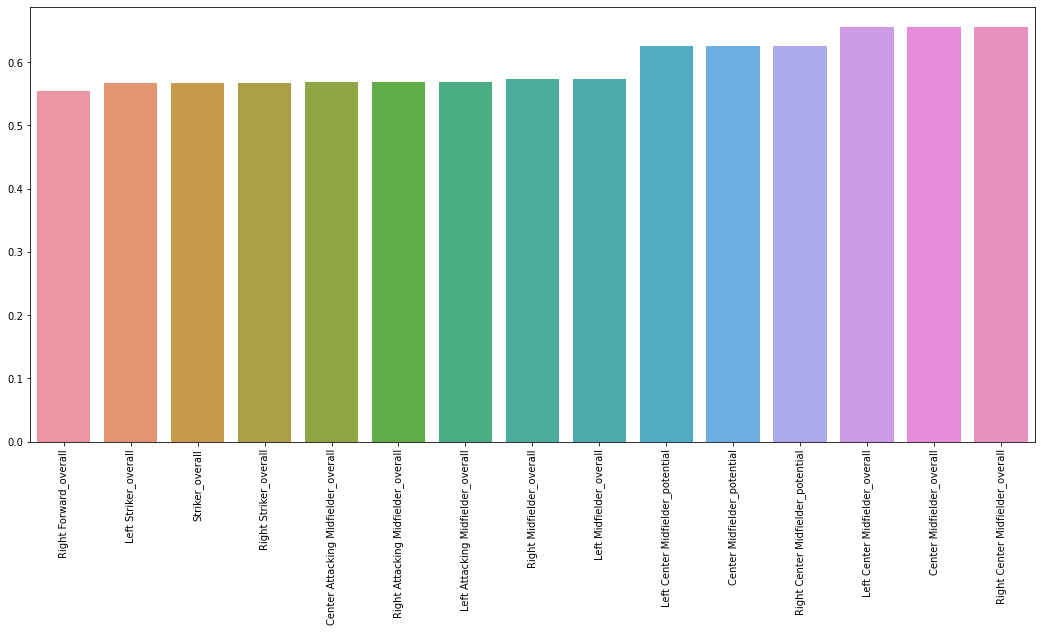

In [359]:
plt.figure(figsize=(18,8))
sns.barplot(x= cat_cols_le.corr()["overall"].sort_values()[45:-1].index,y = cat_cols_le.corr()["overall"].sort_values()[45:-1].values)
plt.xticks(rotation = 90);

**Our Insights:**

Here we have captured that the features like 'Right Center Midfielder and Center Midfielder are highly correlated with overall rating of the players.

We need to take into account these important features when we are building our team

#### Removing Highly correlated data for categorical features

In [360]:
cor_matrix = cat_cols1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cat_cols2 = cat_cols1.drop(to_drop, axis=1)

In [361]:
cat_cols2.shape

(18278, 14)

#### Handling Outliers of Categorical features

In [362]:
cat_cols2

nationality                           club player_positions  \
0       Argentina                   FC Barcelona       RW, CF, ST   
1        Portugal                       Juventus           ST, LW   
2          Brazil            Paris Saint-Germain          LW, CAM   
3        Slovenia                Atlético Madrid               GK   
4         Belgium                    Real Madrid           LW, CF   
...           ...                            ...              ...   
18273    China PR               Beijing Renhe FC               CB   
18274    China PR               Shanghai SIPG FC               CB   
18275    China PR         Hebei China Fortune FC               CM   
18276    China PR  Shanghai Greenland Shenhua FC               CM   
18277    China PR         Hebei China Fortune FC               CM   

      preferred_foot      work_rate body_type real_face team_position  \
0               Left     Medium/Low    Normal       Yes            RW   
1              Right       High/Low    Normal       Yes            LW   
2              Right    High/Medium    Normal       Yes           CAM   
3              Right  Medium/Medium    Normal       Yes            GK   
4              Right    High/Medium    Normal       Yes            LW   
...              ...            ...       ...       ...           ...   
18273          Right    Medium/High    Normal        No           RES   
18274          Right  Medium/Medium    Normal        No           SUB   
18275          Right     Low/Medium      Lean        No           SUB   
18276          Right        Low/Low      Lean        No           SUB   
18277          Right  Medium/Medium    Normal        No           SUB   

       overall  Left Striker_overall  Left Winger_overall  \
0         66.0                  89.0                 93.0   
1         66.0                  91.0                 89.0   
2         66.0                  84.0                 90.0   
3         66.0                  66.0                 66.0   
4         66.0                  83.0                 89.0   
...        ...                   ...                  ...   
18273     66.0                  32.0                 31.0   
18274     66.0                  33.0                 33.0   
18275     66.0                  43.0                 43.0   
18276     66.0                  43.0                 45.0   
18277     66.0                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                87.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            33.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 14 columns]

In [363]:
CR = cat_cols2.drop(['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 
                      'body_type', 'real_face', 'team_position','overall'],axis =1)

CR

Left Striker_overall  Left Winger_overall  \
0                      89.0                 93.0   
1                      91.0                 89.0   
2                      84.0                 90.0   
3                      66.0                 66.0   
4                      83.0                 89.0   
...                     ...                  ...   
18273                  32.0                 31.0   
18274                  33.0                 33.0   
18275                  43.0                 43.0   
18276                  43.0                 45.0   
18277                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                87.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            33.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 5 columns]

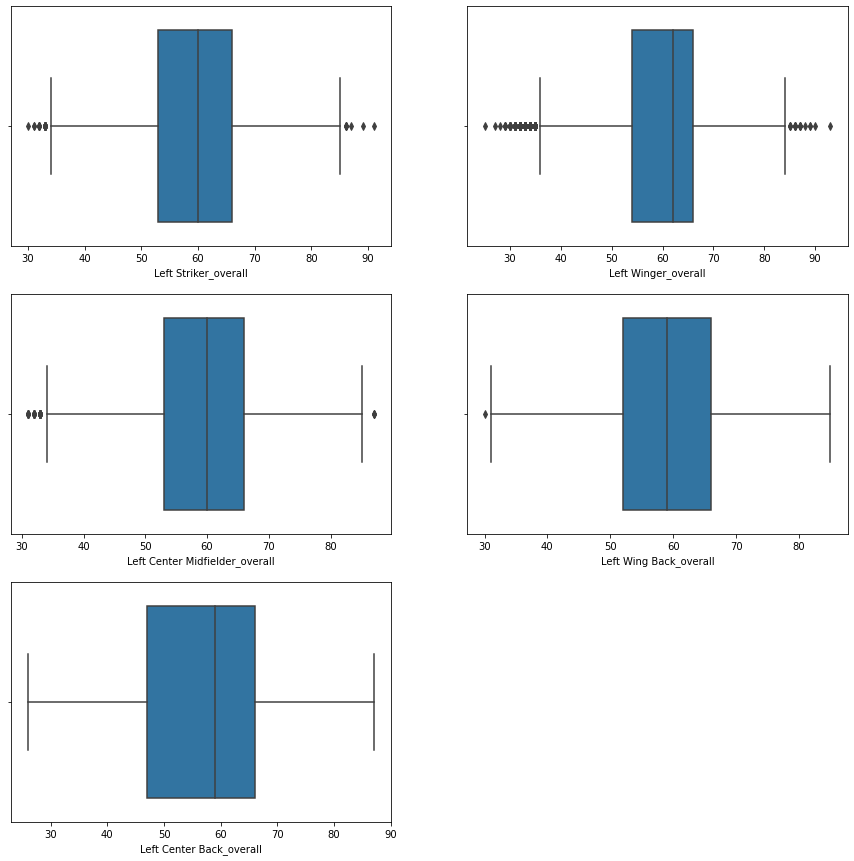

In [364]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
  if plotnumber<=5:
    ax=plt.subplot(3,2,plotnumber)
    sns.boxplot(x=columns, data=CR)
    plotnumber+=1
plt.show()

In [365]:
handle_outliers(CR)

Left Striker_overall  Left Winger_overall  \
0                      60.0                 62.0   
1                      60.0                 62.0   
2                      84.0                 62.0   
3                      66.0                 66.0   
4                      83.0                 62.0   
...                     ...                  ...   
18273                  60.0                 62.0   
18274                  60.0                 62.0   
18275                  43.0                 43.0   
18276                  43.0                 45.0   
18277                  42.0                 44.0   

       Left Center Midfielder_overall  Left Wing Back_overall  \
0                                60.0                    68.0   
1                                81.0                    65.0   
2                                82.0                    66.0   
3                                66.0                    66.0   
4                                83.0                    66.0   
...                               ...                     ...   
18273                            60.0                    43.0   
18274                            36.0                    44.0   
18275                            46.0                    47.0   
18276                            46.0                    48.0   
18277                            46.0                    48.0   

       Left Center Back_overall  
0                          52.0  
1                          53.0  
2                          46.0  
3                          66.0  
4                          49.0  
...                         ...  
18273                      46.0  
18274                      47.0  
18275                      49.0  
18276                      49.0  
18277                      50.0  

[18278 rows x 5 columns]

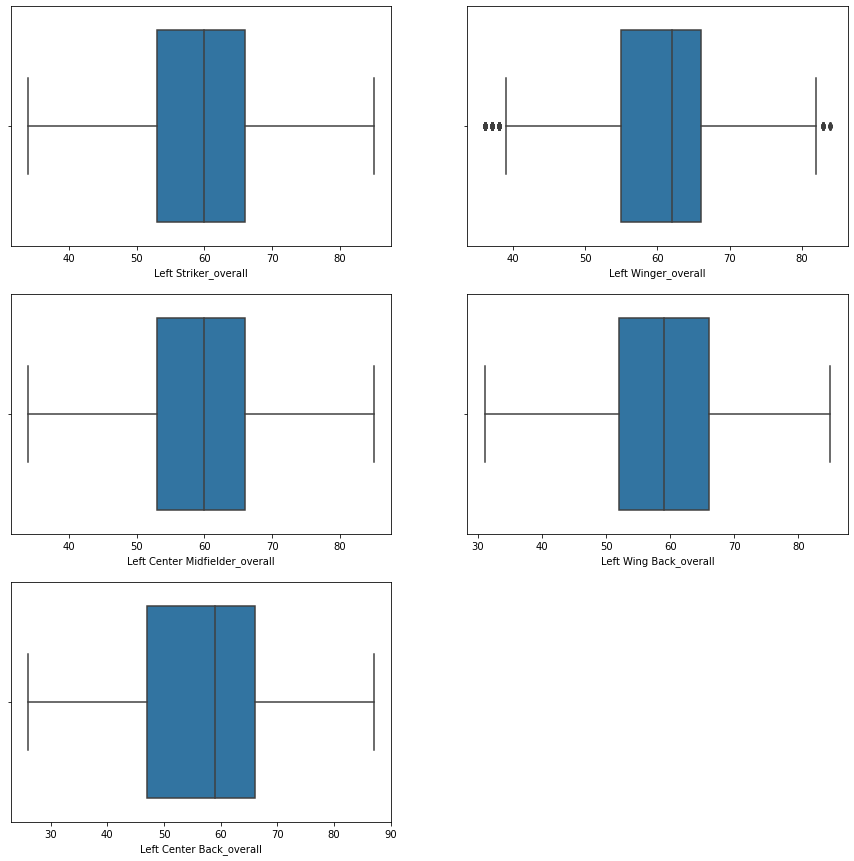

In [366]:
plt.figure(figsize=(15,15))
plotnumber=1
for columns in CR:
  if plotnumber<=5:
    ax=plt.subplot(3,2,plotnumber)
    sns.boxplot(x=columns, data=CR)
    plotnumber+=1
plt.show()

In [367]:
cat_cols2 = cat_cols2[le_cols]

#### One Hot Encoding 

In [368]:
cat_cols2=pd.get_dummies(cat_cols2,drop_first=True)

In [369]:
df2.shape

(18278, 40)

In [370]:
cat_cols2.shape

(18278, 1540)

In [371]:
CR.shape

(18278, 5)

In [372]:
final_df2 = pd.concat([df2,cat_cols2,CR],axis=1)
final_df2.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  32.0      170.0       72.0     66.0       71.0   700000.0    3000.0   
1  34.0      187.0       83.0     66.0       71.0   700000.0    3000.0   
2  27.0      175.0       68.0     66.0       71.0   700000.0    3000.0   
3  26.0      188.0       87.0     66.0       71.0   700000.0    3000.0   
4  28.0      175.0       74.0     66.0       71.0   700000.0    3000.0   

   international_reputation  weak_foot  skill_moves  jersey_number  pace  \
0                       1.0        3.0          4.0           10.0  87.0   
1                       1.0        3.0          2.0            7.0  90.0   
2                       1.0        3.0          2.0           10.0  91.0   
3                       1.0        3.0          1.0            1.0  52.0   
4                       1.0        3.0          4.0           10.0  91.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     59.0       64.0       39.0    66.0                88.0   
1      93.0     82.0       64.0       35.0    78.0                84.0   
2      85.0     59.0       64.0       32.0    58.0                87.0   
3      78.0     59.0       64.0       89.0    66.0                13.0   
4      83.0     86.0       64.0       35.0    66.0                81.0   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                 95.0                        70.0                     62.0   
1                 94.0                        89.0                     83.0   
2                 87.0                        62.0                     87.0   
3                 11.0                        15.0                     43.0   
4                 84.0                        61.0                     89.0   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0               88.0             61.0         93.0               41.0   
1               87.0             89.0         81.0               76.0   
2               87.0             61.0         88.0               87.0   
3               13.0             61.0         13.0               14.0   
4               83.0             95.0         83.0               79.0   

   skill_long_passing  movement_agility  movement_reactions  movement_balance  \
0                92.0              93.0                62.0              95.0   
1                77.0              87.0                62.0              71.0   
2                81.0              96.0                62.0              84.0   
3                40.0              67.0                62.0              49.0   
4                83.0              95.0                62.0              94.0   

   power_shot_power  power_jumping  power_stamina  power_strength  \
0              86.0           68.0           75.0            68.0   
1              95.0           95.0           85.0            78.0   
2              80.0           61.0           81.0            49.0   
3              59.0           78.0           41.0            78.0   
4              82.0           56.0           84.0            63.0   

   power_long_shots  mentality_aggression  mentality_interceptions  \
0              94.0                  48.0                     40.0   
1              93.0                  63.0                     29.0   
2              84.0                  51.0                     36.0   
3              12.0                  34.0                     19.0   
4              80.0                  54.0                     41.0   

   mentality_vision  mentality_penalties  mentality_composure  \
0              94.0                 75.0                 60.0   
1              82.0                 85.0                 60.0   
2              90.0                 90.0                 60.0   
3              65.0                 11.0                 68.0   
4              89.0                 88.0                 91.0   

   goalkeeping_diving  nation

In [373]:
final_df2.shape

(18278, 1585)

We have now converted our dataset into features with only numerical data, so that it can be ready to be fed into a machine learning model.

**However since we will be doing distance based algorithms like K-Means Clustering so it is a must to scale our data.**

## Scaling Our Data

In [374]:
from sklearn.preprocessing import MinMaxScaler
SC= MinMaxScaler()
scaled_data=pd.DataFrame(SC.fit_transform(final_df2),columns= final_df2.columns)

In [375]:
scaled_data

age  height_cm  weight_kg   overall  potential  value_eur  \
0      0.695652   0.171429      0.425  0.485714    0.50000   0.148936   
1      0.782609   0.657143      0.700  0.485714    0.50000   0.148936   
2      0.478261   0.314286      0.325  0.485714    0.50000   0.148936   
3      0.434783   0.685714      0.800  0.485714    0.50000   0.148936   
4      0.521739   0.314286      0.475  0.485714    0.50000   0.148936   
...         ...        ...        ...       ...        ...        ...   
18273  0.260870   0.628571      0.600  0.485714    0.03125   0.008511   
18274  0.260870   0.371429      0.275  0.485714    0.03125   0.008511   
18275  0.130435   0.628571      0.500  0.485714    0.03125   0.008511   
18276  0.086957   0.600000      0.475  0.485714    0.50000   0.008511   
18277  0.434783   0.514286      0.575  0.485714    0.50000   0.008511   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0      0.166667                       0.0        0.0     1.000000   
1      0.166667                       0.0        0.0     0.333333   
2      0.166667                       0.0        0.0     0.333333   
3      0.166667                       0.0        0.0     0.000000   
4      0.166667                       0.0        0.0     1.000000   
...         ...                       ...        ...          ...   
18273  0.111111                       0.0        0.0     0.333333   
18274  0.111111                       0.0        0.0     0.333333   
18275  0.055556                       0.0        0.0     0.333333   
18276  0.055556                       0.0        0.0     0.333333   
18277  0.111111                       0.0        0.0     0.333333   

       jersey_number      pace  shooting   passing  dribbling  defending  \
0           0.173077  0.859375  0.987179  0.517857   0.511628   0.311688   
1           0.115385  0.906250  1.000000  0.928571   0.511628   0.259740   
2           0.173077  0.921875  0.897436  0.517857   0.511628   0.220779   
3           0.000000  0.312500  0.807692  0.517857   0.511628   0.961039   
4           0.173077  0.921875  0.871795  1.000000   0.511628   0.259740   
...              ...       ...       ...       ...        ...        ...   
18273       0.673077  0.390625  0.102564  0.517857   0.511628   0.415584   
18274       0.576923  0.406250  0.115385  0.053571   0.511628   0.428571   
18275       0.711538  0.343750  0.256410  0.250000   0.069767   0.428571   
18276       0.615385  0.421875  0.256410  0.303571   0.116279   0.389610   
18277       0.692308  0.437500  0.217949  0.375000   0.069767   0.415584   

       physic  attacking_crossing  attacking_finishing  \
0        0.52            0.943182             1.000000   
1        0.76            0.897727             0.989247   
2        0.36            0.931818             0.913978   
3        0.52            0.090909             0.096774   
4        0.52            0.863636             0.881720   
...       ...                 ...                  ...   
18273    0.22            0.181818             0.161290   
18274    0.16            0.215909             0.193548   
18275    0.22            0.306818             0.333333   
18276    0.24            0.386364             0.344086   
18277    0.30            0.443182             0.301075   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                        0.708861                 0.517857           0.977011   
1                        0.949367                 0.892857           0.965517   
2                        0.607595                 0.964286           0.965517   
3                        0.012658                 0.178571           0.114943   
4                        0.594937                 1.000000           0.919540   
...                           ...                      ...                ...   
18273                    0.329114                 0.035714           0.275862   
18274                    0.354430               

## Attempting Principal Component Analysis

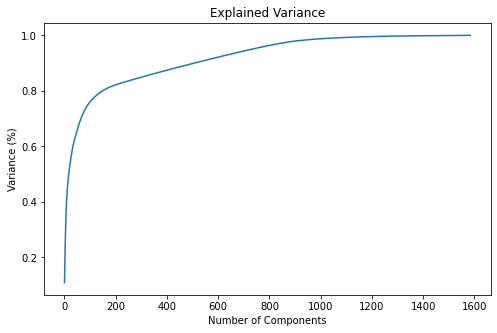

In [376]:
## getting the optimal number of pca
from sklearn.decomposition import PCA

# Initialize the PCA object
pca = PCA()
principalComponents = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
           #np.cumcum - Returns the cumulative sum of the elements along a given axis.
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [377]:
# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that add up to 95% of the explained variance ratio
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Print the number of components
print("Number of components that add up to 95% of the explained variance ratio:", n_components)

Number of components that add up to 95% of the explained variance ratio: 732


In [378]:
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(final_df2)

In [379]:
# Create the new DataFrame by adding PCA columns to the original dataframe
pca_df = pd.DataFrame(new_data, columns=["PC{}".format(i+1) for i in range(n_components)])

In [380]:
pca_df

PC1          PC2         PC3        PC4        PC5  \
0     -207258.107200  -483.813059 -125.799226 -17.455282  -1.230137   
1     -207258.106732  -483.746359 -135.325281  -8.087171  17.233450   
2     -207258.107104  -483.801720 -135.426985 -26.970312   8.853055   
3     -207258.110232  -484.182823   82.598881 -13.922529  62.714797   
4     -207258.106807  -483.759214 -138.424226 -17.211171  31.048601   
...              ...          ...         ...        ...        ...   
18273 -867258.818371  -227.356563   69.442998 -11.812267 -24.604448   
18274 -867258.818400  -227.363823   63.793709 -13.169559 -37.705848   
18275 -867260.722317 -1227.294493   40.723217  -3.497571 -30.613916   
18276 -867260.722117 -1227.269106   31.255213  -0.762938 -28.525008   
18277 -867258.817735  -227.274347   34.137000   1.376478 -29.594247   

             PC6        PC7        PC8        PC9       PC10       PC11  \
0       6.289115 -10.743917  -4.083092   3.457554  -3.736491  17.921789   
1      41.044264 -23.477669   0.661150  -6.141907  -8.532200 -10.985165   
2      -3.893450   2.970682   2.171609  -9.991104  -7.780302   3.956862   
3       2.714999  -9.764465 -32.737078   5.483988  22.701722   1.277800   
4      -2.625768  -5.984960   2.657970  -7.428825 -11.306032  10.636744   
...          ...        ...        ...        ...        ...        ...   
18273 -16.604558   2.098985   1.167463  12.699570  13.390634  -7.091133   
18274 -23.755079   6.049802  -3.634656  14.881458   7.879256  -4.613694   
18275  -6.514631  23.056979  10.404156  11.894486   4.468336   3.281381   
18276 -10.288748  23.074018   4.139448  11.792808   2.063643  -2.199036   
18277 -14.728244  22.003634   3.694537  15.865528   1.362919  -2.220473   

            PC12       PC13       PC14       PC15       PC16       PC17  \
0      -0.251718   0.296452  29.717255 -13.931117  -2.057447  18.411080   
1     -11.423820 -15.705772  10.268158 -25.791770  -7.717621   3.066190   
2     -20.716293  -6.285879   2.112912  -6.676707   5.270814  -3.806440   
3      20.516795  -8.744527  12.586911  -5.919254  16.212382  -5.734933   
4      -3.335522 -13.605631  -4.339230   6.905057   9.157657   8.806132   
...          ...        ...        ...        ...        ...        ...   
18273 -12.983149   0.958930  -4.489246  13.156040  -6.994499  -1.156062   
18274 -19.351999   4.453425  -1.762553   6.422057  -7.542755  -1.139578   
18275  -2.893808  -4.667704   0.844078  -6.750232   0.206008  -3.612464   
18276   7.400105  -2.154846  -3.334660  -7.649262   2.844421  -7.110008   
18277  10.669194 -11.011210  -0.187500  -5.948107  -0.663451   6.129343   

            PC18      PC19      PC20      PC21       PC22       PC23  \
0     -10.064604  2.004798  0.086580  7.132268  32.014725  13.019284   
1      12.704799  3.880862 -8.269860 -7.646666   9.994127   9.082507   
2      10.644885  5.427886 -5.068720 -7.540635  12.071455  16.427910   
3      -7.210179  7.997313  8.564962  4.997727   5.550271  10.252148   
4       8.015101 -1.902177 -5.160578 -7.205282   3.713598   8.741771   
...          ...       ...       ...       ...        ...        ...   
18273   0.838743 -5.608956 -1.047838  3.478699   5.348937   9.936899   
18274   3.313133 -8.688405 -6.697631  4.071260  -2.976364   5.346182   
18275  -1.415055 -2.940756  0.470273 -6.835929   2.619075   6.610803   
18276   2.171659  1.356306 -0.098788  4.734058  -0.047905   1.420882   
18277   7.011319 -0.105824 -1.811666  8.561647   0.065577   4.924243   

            PC24       PC25       PC26       PC27       PC28      PC29  \
0      -2.586452 -17.374093  -3.371431  -7.176769 -14.805740 -2.137243   
1      -2.324629   0.870459   0.327349   5.661142  -7.908363 -8.122753   
2      -5.069137 -11.010245 -13.524761  10.292573  -9.214861 -4.691702   
3      -6.436207  -3.286891  16.549149   6.294334  -6.155404 -5.302524   
4     -21.559606   0.247743   6.319115  10.697864  -6.503173 -7.866625   
...          ...        ...        ...        ...    

## Clustering our Data

In [381]:
X= pca_df
X.shape

(18278, 732)

### K-Means Clustering using Elbow Method

Using elbow method we will first find out the optimal number of n_cluster for our K-Means Clustering algorithms

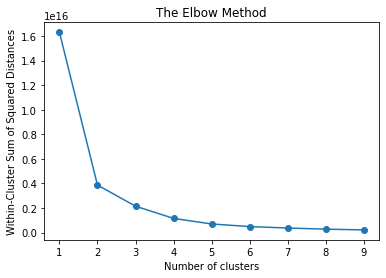

In [382]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared Distances')
plt.show()

### K-Means Clustering using silhouettee score

In [383]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans


for i in range(2,6):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    label=model.labels_
    label
    from sklearn.metrics import silhouette_score
    score=silhouette_score(X,label)
    print('The silhouettee_score for {} clusters in KMeans Algorithm is {}.'.format(i,round(score,2)))

The silhouettee_score for 2 clusters in KMeans Algorithm is 0.79.
The silhouettee_score for 3 clusters in KMeans Algorithm is 0.65.
The silhouettee_score for 4 clusters in KMeans Algorithm is 0.59.
The silhouettee_score for 5 clusters in KMeans Algorithm is 0.62.


### K-Means Clustering using Davis Bouldin Score


In [384]:
from sklearn.metrics import davies_bouldin_score

for i in range(2,6):
    n_clusters = i
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    labels = model.labels_
    score = davies_bouldin_score(X, labels)
    print("Davies bouldin score for {} clusters is {}.".format(i,round(score,2)))

Davies bouldin score for 2 clusters is 0.4.
Davies bouldin score for 3 clusters is 0.54.
Davies bouldin score for 4 clusters is 0.52.
Davies bouldin score for 5 clusters is 0.47.


#### We select n_cluster = 2 based on results from elbow method,silhouettee score and Davies bouldin score

In [385]:
final_kmeans_model = KMeans(n_clusters=2,random_state=42)
cluster_labels = final_kmeans_model.fit_predict(X)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [386]:
# Count the number of data points in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()

# Print the cluster counts
print(cluster_counts)

0    15976
1     2302
dtype: int64


Here we find 2 labels 0 and 1

#### We put the clusters in our dataset

In [387]:
final_df2['Cluster'] = cluster_labels
final_df2[final_df2['Cluster']==1]

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
200   25.0      192.0       92.0     83.0       83.0  2600000.0    3000.0   
201   38.0      185.0       84.0     83.0       83.0  2600000.0   11000.0   
286   36.0      188.0       92.0     82.0       82.0  3700000.0    3000.0   
489   35.0      188.0       83.0     80.0       80.0  4000000.0   17000.0   
491   35.0      174.0       73.0     80.0       80.0  4700000.0   13000.0   
...    ...        ...        ...      ...        ...        ...       ...   
6639  19.0      180.0       70.0     68.0       83.0  1900000.0    2000.0   
6643  21.0      180.0       73.0     68.0       82.0  2000000.0   12000.0   
6646  19.0      178.0       74.0     68.0       82.0  1900000.0    1000.0   
6648  20.0      173.0       63.0     68.0       82.0  2000000.0    3000.0   
6651  19.0      176.0       70.0     68.0       82.0  1900000.0    7000.0   

      international_reputation  weak_foot  skill_moves  jersey_number  pace  \
200                        1.0        3.0          1.0           17.0  33.0   
201                        1.0        3.0          1.0            1.0  55.0   
286                        1.0        3.0          1.0           25.0  57.0   
489                        1.0        3.0          1.0           13.0  39.0   
491                        1.0        3.0          2.0           14.0  66.0   
...                        ...        ...          ...            ...   ...   
6639                       1.0        3.0          4.0           26.0  81.0   
6643                       1.0        3.0          4.0           29.0  80.0   
6646                       1.0        3.0          3.0           28.0  67.0   
6648                       1.0        3.0          3.0            9.0  67.0   
6651                       1.0        3.0          3.0           38.0  75.0   

      shooting  passing  dribbling  defending  physic  attacking_crossing  \
200       74.0     59.0       78.0       80.0    77.0                13.0   
201       61.0     86.0       85.0       84.0    75.0                13.0   
286       82.0     82.0       79.0       81.0    82.0                11.0   
489       81.0     80.0       84.0       79.0    74.0                11.0   
491       53.0     72.0       68.0       79.0    75.0                68.0   
...        ...      ...        ...        ...     ...                 ...   
6639      61.0     60.0       71.0       54.0    56.0                59.0   
6643      48.0     61.0       75.0       27.0    54.0                65.0   
6646      65.0     64.0       71.0       68.0    71.0                64.0   
6648      63.0     65.0       68.0       44.0    58.0                58.0   
6651      64.0     68.0       74.0       52.0    58.0                66.0   

      attacking_finishing  attacking_heading_accuracy  \
200                  15.0                        56.0   
201                  12.0                        25.0   
286                  14.0                        56.0   
489                  11.0                        56.0   
491                  42.0                        66.0   
...                   ...                         ...   
6639                 59.0                        39.0   
6643                 47.0                        37.0   
6646                 64.0                        68.0   
6648                 65.0                        49.0   
6651                 62.0                        62.0   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
200                      37.0               17.0             26.0   
201                      62.0               14.0             25.0   
286                      62.0               11.0             61.0   
489                      62.0               13.0             61.0   
491                      79.0               51.0             58.0   
...                       ...                ...              ...   
6639                     63.0           

#### We visualize which cluster of players has the greater potential rating

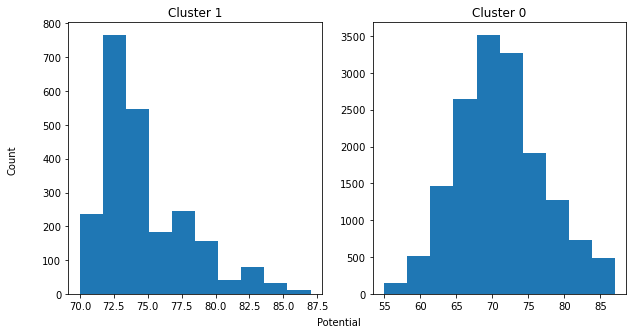

In [388]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster']==1]['potential'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster']==0]['potential'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Potential', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()


**Our Insights:**

Here we see that the cluster labeled 1 has more players with greater potential

#### We visualize which cluster of players has the greater overall rating

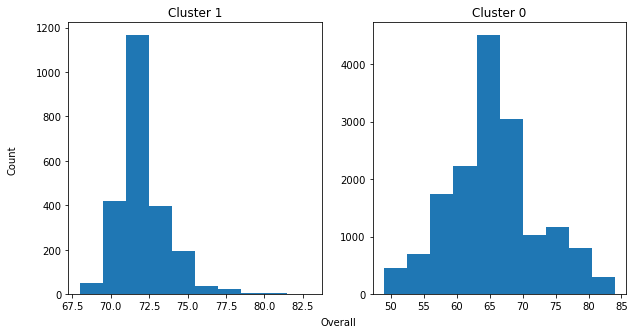

In [389]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster']==1]['overall'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster']==0]['overall'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Overall', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

**Our Insights:**

Here we see that the cluster labeled 1 has more players with greater overall rating

#### Finding the features that are highly correlated with our clusters

In [390]:
final_df2.corr()['Cluster'][:-2].sort_values()

team_position_RES          -0.099190
work_rate_Medium/Medium    -0.098829
jersey_number              -0.078149
team_position_SUB          -0.060494
nationality_England        -0.052665
                              ...   
overall                     0.322516
wage_eur                    0.377651
value_eur                   0.873302
international_reputation         NaN
weak_foot                        NaN
Name: Cluster, Length: 1584, dtype: float64

<AxesSubplot:xlabel='value_eur', ylabel='overall'>

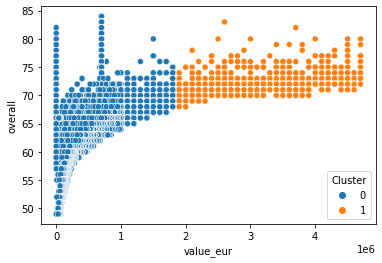

In [391]:
sns.scatterplot(data =final_df2, x= 'value_eur',y='overall',hue ='Cluster')

**Our Insights:** 

We find that value_eur and overall rating are positively correlated to each other and as our overall rating and value_eur increases the chances of players being in cluster 1 is more

### Creating an ideal budget for competetive players

In [392]:
cat_cols1.drop('overall',axis=1,inplace = True)

**From our findings we have derived that the players from cluster 1 have more potential and overall rating so we should take players from cluster 1 to form our team.**

In [393]:
final_df = pd.concat([cat_cols1,num_col,final_df2['Cluster']],axis=1)
final_df = final_df[final_df['Cluster']==1]


In [394]:
# Sorting values and bringing name of players back into our new dataset
final_df = final_df.sort_values(by=['value_eur', 'overall'], ascending=False)
final_df['Name'] = df['short_name']
final_df

nationality                    club player_positions  \
491            Argentina  Hebei China Fortune FC          CDM, CB   
563               Brazil              Fluminense          CDM, CM   
673             Slovakia                Atalanta               CB   
1146  Bosnia Herzegovina              Hertha BSC               ST   
1148             England      New York Red Bulls               ST   
...                  ...                     ...              ...   
6637            Scotland              Portsmouth      CDM, CB, RB   
6638               Wales           Oxford United      CAM, LW, ST   
6639              Norway           FK Bodø/Glimt               RW   
6646         Ivory Coast                 Perugia               CM   
6651             Nigeria                 Bologna      CM, CAM, CF   

     preferred_foot    work_rate body_type real_face team_position  \
491           Right     Low/High    Normal       Yes           CDM   
563           Right    High/High    Stocky        No           CDM   
673           Right  Medium/High    Normal       Yes           SUB   
1146          Right   Medium/Low    Normal        No            ST   
1148          Right  High/Medium    Normal       Yes           SUB   
...             ...          ...       ...       ...           ...   
6637          Right  Medium/High      Lean        No           RDM   
6638          Right  High/Medium    Normal       Yes           CAM   
6639           Left    High/High      Lean        No            RW   
6646          Right  High/Medium    Normal        No           SUB   
6651          Right  High/Medium      Lean        No           SUB   

      Left Striker_overall  Left Striker_potential  Striker_overall  \
491                   62.0                    65.0             62.0   
563                   66.0                    68.0             66.0   
673                   52.0                    55.0             52.0   
1146                  75.0                    77.0             75.0   
1148                  76.0                    78.0             76.0   
...                    ...                     ...              ...   
6637                  54.0                    56.0             54.0   
6638                  63.0                    65.0             63.0   
6639                  61.0                    63.0             61.0   
6646                  67.0                    69.0             67.0   
6651                  66.0                    68.0             66.0   

      Striker_potential  Right Striker_overall  Right Striker_potential  \
491                65.0                   62.0                     65.0   
563                68.0                   66.0                     68.0   
673                55.0                   52.0                     55.0   
1146               77.0                   75.0                     77.0   
1148               78.0                   76.0                     78.0   
...                 ...                    ...                      ...   
6637               56.0                   54.0                     56.0   
6638               65.0                   63.0                     65.0   
6639               63.0                   61.0                     63.0   
6646               69.0                   67.0                     69.0   
6651               68.0                   66.0                     68.0   

      Left Winger_overall  Left Winger_potential  Left Forward_overall  \
491                  65.0                   68.0                  64.0   
563                  70.0                   72.0                  69.0   
673                  47.0                   50.0                  48.0   
1146                 70.0                   72.0                  73.0   
1148                 72.0                   74.0                  74.0   
...                   ...                    ...                   ...   
6637                 56.0                   58.0                  55.0 

In [395]:
# Taking the columns needed to find the best players
df3 = final_df[["Name","club","team_position","overall","value_eur"]]
df3

Name                    club team_position  overall  \
491        J. Mascherano  Hebei China Fortune FC           CDM     80.0   
563       Everton Andrão              Fluminense           CDM     80.0   
673            M. Škrtel                Atalanta           SUB     79.0   
1146         V. Ibišević              Hertha BSC            ST     77.0   
1148  B. Wright-Phillips      New York Red Bulls           SUB     77.0   
...                  ...                     ...           ...      ...   
6637         R. McCrorie              Portsmouth           RDM     68.0   
6638         B. Woodburn           Oxford United           CAM     68.0   
6639            H. Evjen           FK Bodø/Glimt            RW     68.0   
6646            C. Kouan                 Perugia           SUB     68.0   
6651          K. Michael                 Bologna           SUB     68.0   

      value_eur  
491   4700000.0  
563   4700000.0  
673   4700000.0  
1146  4700000.0  
1148  4700000.0  
...         ...  
6637  1900000.0  
6638  1900000.0  
6639  1900000.0  
6646  1900000.0  
6651  1900000.0  

[2302 rows x 5 columns]

In [396]:
# Postions required to fill to form a team

positions = ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CM', 'CAM', 'LW', 'ST', 'RW']

In [397]:
# Making a selection of players based on positions and players who has the most value_eur and overall rating.  

selected_players = pd.DataFrame(index=df3.index)

for i in positions:
    row = df3[df3['team_position'] == i].head(1)

    selected_players = selected_players.append(row)


selected_players = selected_players.dropna()
selected_players

Name                           club team_position  overall  \
1954   S. Grytebust                   FC København            GK     75.0   
2765       N. Murru                      Sampdoria            LB     73.0   
2769   H. Magnússon                PFC CSKA Moscow            CB     73.0   
2769   H. Magnússon                PFC CSKA Moscow            CB     73.0   
2777      F. Campos                      Colo-Colo            RB     73.0   
491   J. Mascherano         Hebei China Fortune FC           CDM     80.0   
2880       M. Abeid                      FC Nantes            CM     73.0   
2919      P. Kasami                        FC Sion           CAM     73.0   
3359   S. Adegbenro                   Rosenborg BK            LW     72.0   
1146    V. Ibišević                     Hertha BSC            ST     77.0   
1546      G. Moreno  Shanghai Greenland Shenhua FC            RW     76.0   

      value_eur  
1954  4700000.0  
2765  4700000.0  
2769  4700000.0  
2769  4700000.0  
2777  4700000.0  
491   4700000.0  
2880  4300000.0  
2919  4600000.0  
3359  4600000.0  
1146  4700000.0  
1546  4700000.0

### Budget for our ideal item

In [398]:
print(f"Total budget of this player combination will be {selected_players.value_eur.sum()}")

Total budget of this player combination will be 51100000.0


### Hierarchial Clustering

In [399]:
from sklearn.cluster import AgglomerativeClustering

# Initialize AgglomerativeClustering with the desired number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Fit the model on your preprocessed data X
agg_clustering.fit_predict(X)

# Get the labels assigned by AgglomerativeClustering to each data point
labels1 = agg_clustering.labels_


In [400]:
labels1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [401]:
import pandas as pd

# Count the number of data points in each cluster
cluster_counts = pd.Series(labels1).value_counts()

# Print the cluster counts
print(cluster_counts)

0    16097
1     2181
dtype: int64


In [402]:
final_df2 = final_df2.drop('Cluster',axis=1)
final_df2['Cluster_H'] = labels1

#### Visualizing which cluster of players are having greater potential rating

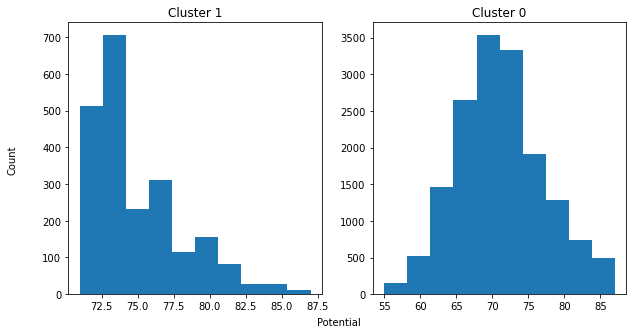

In [403]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster_H']==1]['potential'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster_H']==0]['potential'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Potential', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

#### Visualizing which cluster of players are having greater overall rating

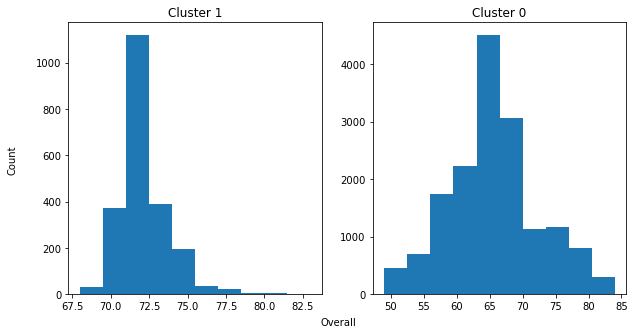

In [404]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram in the first subplot
axs[0].hist(final_df2[final_df2['Cluster_H']==1]['overall'], bins=10)
axs[0].set_title('Cluster 1')

# Plot the second histogram in the second subplot
axs[1].hist(final_df2[final_df2['Cluster_H']==0]['overall'], bins=10)
axs[1].set_title('Cluster 0')

# Add a common x-axis label and y-axis label
fig.text(0.5, 0.04, 'Overall', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

# Show the plot
plt.show()

#### Finding the features that are highly correlated with our clusters

In [405]:
final_df2.corr()['Cluster_H'][:-2].sort_values()

team_position_RES          -0.095297
work_rate_Medium/Medium    -0.094591
jersey_number              -0.076033
team_position_SUB          -0.058286
nationality_England        -0.049778
                              ...   
overall                     0.316822
wage_eur                    0.369988
value_eur                   0.872354
international_reputation         NaN
weak_foot                        NaN
Name: Cluster_H, Length: 1584, dtype: float64

<AxesSubplot:xlabel='value_eur', ylabel='overall'>

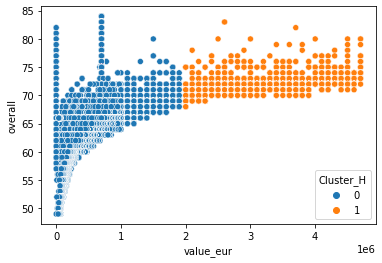

In [406]:
sns.scatterplot(data =final_df2, x= 'value_eur',y='overall',hue ='Cluster_H')

**Here we see that both KMeans Clustering and Hierarchical clustering are giving us more or less similar results**

# Task3:- Explore the data and attempt all the below asked questions in a step by step manner:


### Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

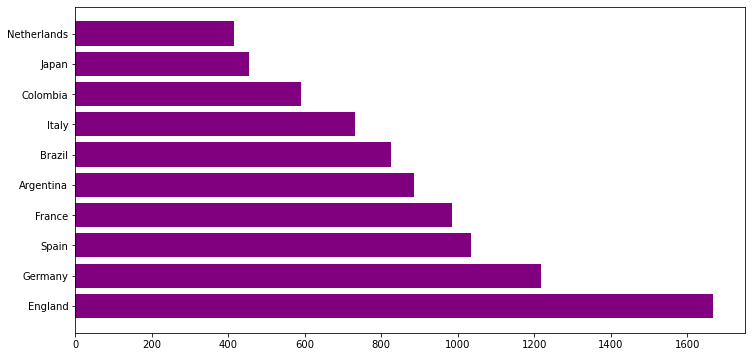

In [407]:
plt.figure(figsize = (12,6))
plt.barh(df["nationality"].value_counts()[:10].keys(),df["nationality"].value_counts()[:10],color = 'purple');

**Our Insights:**

Here we can clearly see in the graph that 'England' and 'Germany' are producing the most footballers

### Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

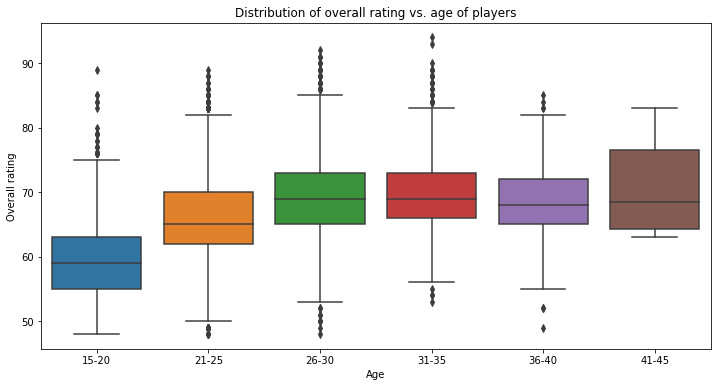

In [408]:
fifa_df = df
fifa_df = fifa_df.sort_values(by='age')
fifa_df["Age Group"] = pd.cut(fifa_df["age"], bins=[15, 20, 25, 30, 35, 40, 45], labels=["15-20", "21-25", "26-30", "31-35", "36-40", "41-45"])
plt.figure(figsize = (12,6))
sns.boxplot(fifa_df["Age Group"], fifa_df["overall"])
plt.xlabel("Age")
plt.ylabel("Overall rating")
plt.title("Distribution of overall rating vs. age of players")
plt.show()

**Our Insights:**

From the above graph we can conclude that after the age of 30-35 years of age the overall rating of the player tends to go down

### Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

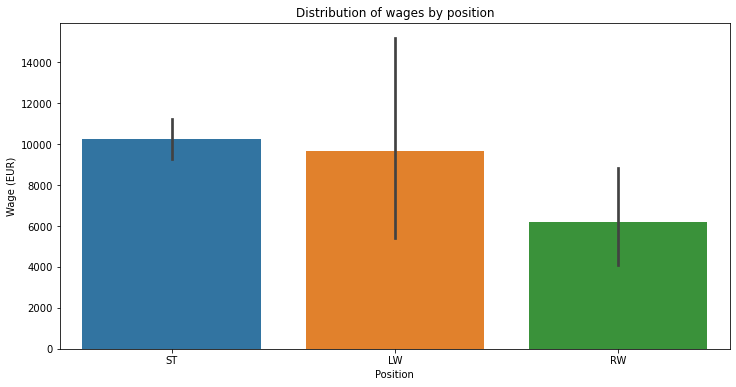

In [409]:
plt.figure(figsize = (12,6))

# Create a new column to store the position
forwards_df = fifa_df[(fifa_df["player_positions"] == 'LW') | (fifa_df["player_positions"] == 'RW')| (fifa_df["player_positions"] == 'ST')]

# Plot the distribution of wages for each position
sns.barplot(x="player_positions", y="wage_eur", data=forwards_df)
plt.xlabel("Position")
plt.ylabel("Wage (EUR)")
plt.title("Distribution of wages by position")
plt.show()

**Our Insights:**

From the barplot we can see that on an average the striker players are getting paid the most

# Model Comparison Report

For our fifa20 dataset we have attempted to cluster similar types of players using KMeans clustering and hierarchical clustering. In both instances we have seen similar results.

So we are suggesting KMeans Clustering with number of cluster = 2, is best for clustering this dataset.

# Report on Challenges faced

The challenges we faced during this project are as follows:

1) The fifa20 dataset is a huge dataset with 104 columns as such we needed to handle the features a bit differently; we splitted our dataset into numerical and categorical features and then we handled each feature.

2) The dataset contained lots of extreme outliers in some features of the dataset which was giving us incorrect results; we had to handle these outliers by making a separate function and run the function on those features.

3) In case of scaling the categorical data we used one hot encoding, as a result our features were increased to almost 1585. We had to do PCA to decrease these features into 732

# Conclusion

The fifa20 dataset is a challenging dataset where one has to do unsupervised machine learning; meaning there were no target or label in the dataset. Two main takeaways of this project is: clustering the players based on their features and finding the most important features to group these players on. As it is an unsupervised machine learning one has to do a lot of assumptions. 
In our case we also had to make a lot of assumptions but all of our assumptions were backed by facts and numbers. As we have seen that in order to cluster the players using KMeans; we selected number of cluster equal to 2, and this cluster number was selected by best score of elbow method, silhouettee score and Davis Bouldin score.

Using the clusters we have divided our dataset into 2 cluster and we assumed that players in cluster 1 were more likely to have greater potential to get picked to build an ideal team. We also found that the players' value in euro is highly correlated with these clusters; so we grouped players that have greater value in euro and overall rating and based on their positions we tried to form a team which can be formed with the minimum budget.

**Our overall suggestion for clustering this dataset is using KMeans Clustering with number of cluster = 2**

**To build an ideal team the minimum budget should be 51,100,000.00+**
